EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Xiomara Kuwae`
  - `# Luis José López`
- Usuario de GitHub (opcional):  `https://github.com/luijolo/Machine-Learning/tree/main/Tarea%202`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [2]:
pip install ucimlrepo

In [16]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [17]:
import pandas as pd

# 1. Concatenar X e y en un DataFrame consolidado
# Usamos pd.concat. Asumimos que quieres concatenar horizontalmente (columnas)
df_consolidado = pd.concat([X, y], axis=1)

# Se elimina la variable "duration"
df_consolidado = df_consolidado.drop('duration', axis=1)

In [18]:
# 2. Mostrar las primeras cinco observaciones
print("Primeras cinco observaciones del DataFrame consolidado:")
print(df_consolidado.head())

Primeras cinco observaciones del DataFrame consolidado:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  campaign  pdays  previous poutcome   y  
0     NaN            5   may         1     -1         0      NaN  no  
1     NaN            5   may         1     -1         0      NaN  no  
2     NaN            5   may         1     -1         0      NaN  no  
3     NaN            5   may         1     -1         0      NaN  no  
4     NaN            5   may         1     -1         0      NaN  no  


In [19]:
# 3. Mostrar información sobre el tipo de variable de cada columna
print("\nInformación sobre los tipos de datos de las columnas:")
print(df_consolidado.dtypes)


Información sobre los tipos de datos de las columnas:
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object


In [20]:
# 4. Mostrar estadísticas descriptivas según el tipo de variable
# Estadísticas para variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df_consolidado.select_dtypes(include=['int64', 'float64']).describe())


Estadísticas descriptivas para variables numéricas:
                age        balance   day_of_week      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419      2.763841     40.197828   
std       10.618762    3044.765829      8.322476      3.098021    100.128746   
min       18.000000   -8019.000000      1.000000      1.000000     -1.000000   
25%       33.000000      72.000000      8.000000      1.000000     -1.000000   
50%       39.000000     448.000000     16.000000      2.000000     -1.000000   
75%       48.000000    1428.000000     21.000000      3.000000     -1.000000   
max       95.000000  102127.000000     31.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  


In [21]:
# Estadísticas para variables categóricas (si las hay)
print("\nEstadísticas descriptivas para variables categóricas:")
print(df_consolidado.select_dtypes(include=['object', 'category']).describe())

df_consolidado.head()


Estadísticas descriptivas para variables categóricas:
                job  marital  education default housing   loan   contact  \
count         44923    45211      43354   45211   45211  45211     32191   
unique           11        3          3       2       2      2         2   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211     8252  45211  
unique     12        3      2  
top       may  failure     no  
freq    13766     4901  39922  


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,1,-1,0,NaN,no


### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [22]:
# 1. Identificar columnas con missing values y contarlos
print("Columnas con valores nulos y su cantidad:")
missing_values = df_consolidado.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con nulos
print(missing_values)

Columnas con valores nulos y su cantidad:
job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


In [23]:
# 2. Se elimina la variable "poutcome", por el gran % de missing (82%)
df_consolidado = df_consolidado.drop('poutcome', axis=1)
# 3. Actualizar la lista de columnas con valores nulos después de eliminar 'poutcome'
missing_values = df_consolidado.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con nulos

In [24]:
# 4. Imputar valores nulos para variables categóricas
for column in missing_values.index:
    # Imputar con la moda para variables categóricas
    df_consolidado[column] = df_consolidado[column].fillna(df_consolidado[column].mode()[0])
    print(f"Imputado '{column}' (categórica) con la moda: {df_consolidado[column].mode()[0]}")

Imputado 'job' (categórica) con la moda: blue-collar
Imputado 'education' (categórica) con la moda: secondary
Imputado 'contact' (categórica) con la moda: cellular


In [25]:
# 5. Verificar que no queden valores nulos
print("\nValores nulos después de la imputación:")
print(df_consolidado.isnull().sum())


Valores nulos después de la imputación:
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
campaign       0
pdays          0
previous       0
y              0
dtype: int64





---

Para el caso de poutcome se optó crear una categoría de unknowm para mantener la columna.

Para contact se optó por reemplazar por la moda porque generaría el menor impacto sobre la variable que tiene solo 2 categorías.


---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

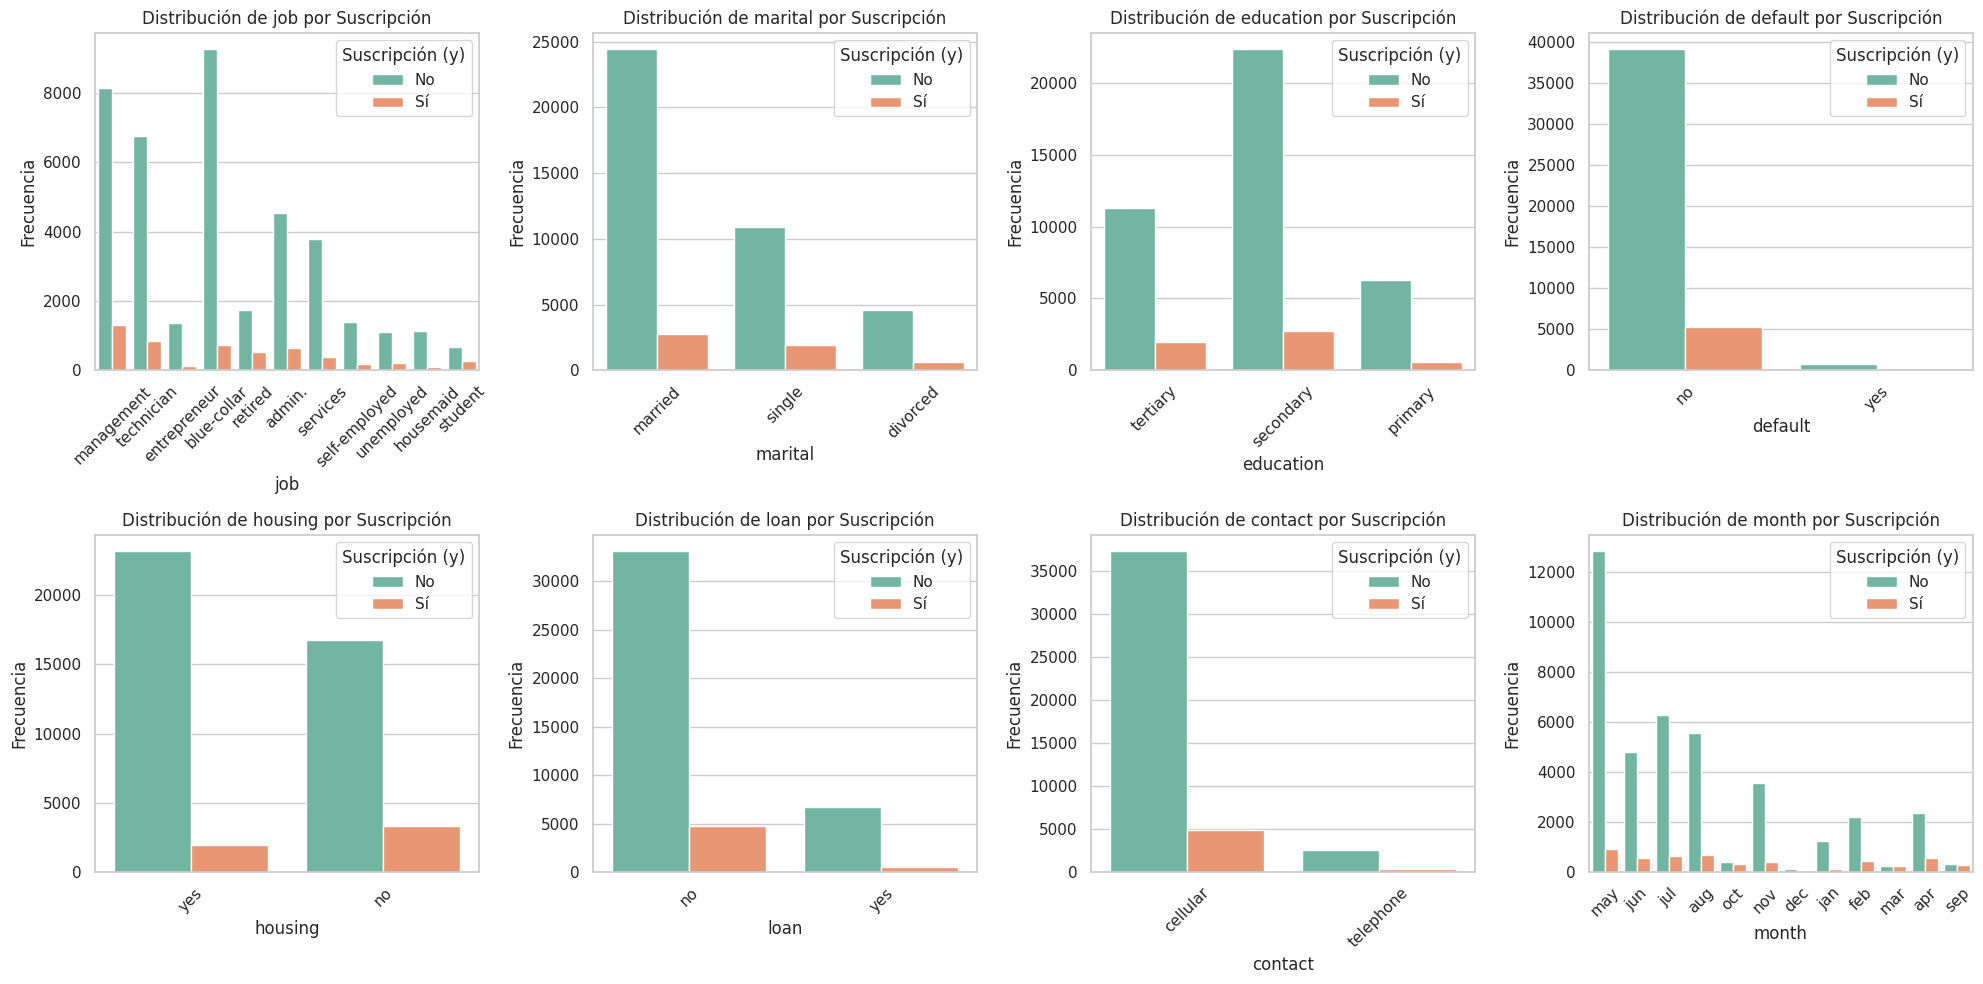

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con subplots en una cuadrícula 2x4
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Generar histogramas para cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df_consolidado, x=var, hue='y', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribución de {var} por Suscripción')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Suscripción (y)', labels=['No', 'Sí'])

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()




---


Al analizar los histogramas, la variable “month” muestra variaciones significativas, con algunos meses (marzo, septiembre y octubre) presentando mayores tasas de “Sí”, sugiriendo un efecto estacional en la efectividad de las campañas, por lo que es una variable con potencial predictivo. Por otra parte, destaca “job” por las proporciones de “Sí” en “retired” y “student” frente a “blue-collar” y “management”, reflejando diferencias socioeconómicas.

Asimismo, destaca la variable “education”, la que indica que “tertiary” tiene una mayor predisposición a tomar el depósito, mientras que las variables “housing” y “loan” sugieren que la ausencia de préstamos favorece la suscripción”.

Por último, variables como “marital”, “contact” y “default” parecen tener menos potencial predictivo, ya que muestran efectos menos marcados, con menor impacto predictivo.


---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

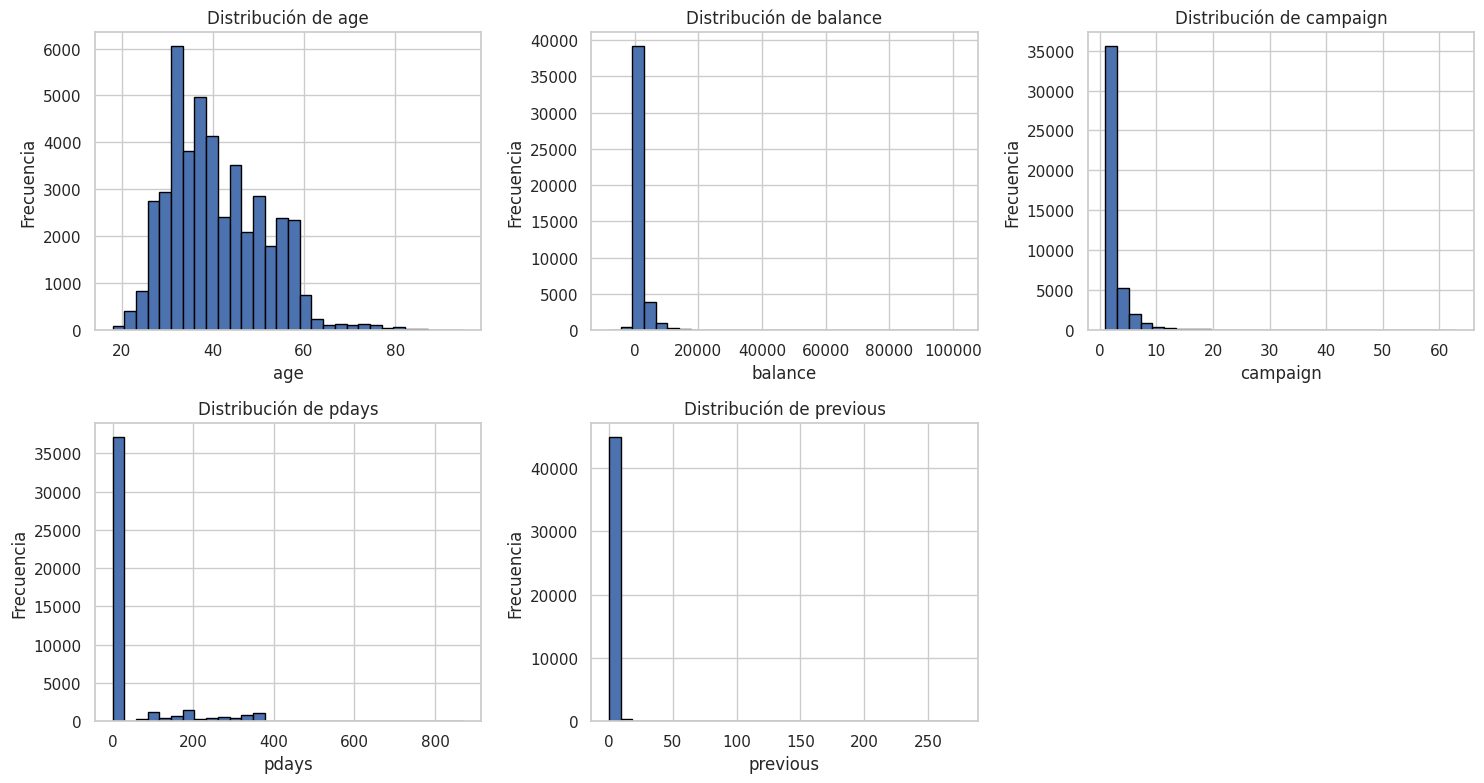

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables numéricas
numericas = ['age', 'balance', 'campaign', 'pdays', 'previous']

# Vemos primero las distribuciones de las variables
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
axes = axes.flatten()

for i, var in enumerate(numericas):
    axes[i].hist(df_consolidado[var].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Ocultar el subplot vacío (sexto subplot)
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

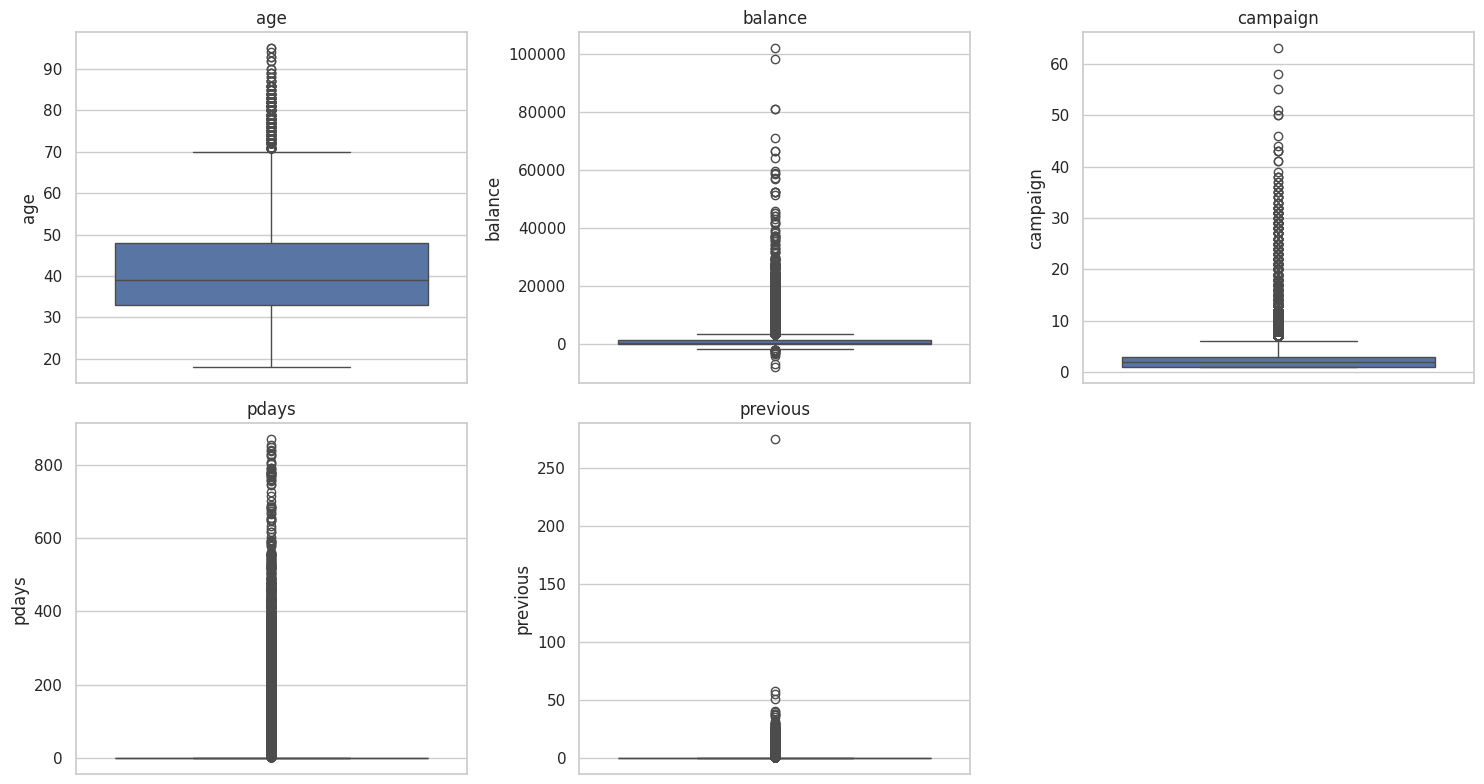

Contacto previo > 100: 1


In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
axes = axes.flatten()

for i, var in enumerate(numericas):
    sns.boxplot(y=df_consolidado[var], ax=axes[i])
    axes[i].set_title(var)

# Ocultar el subplot vacío (sexto subplot)
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

# Verificar outliers en 'previous'
print(f"Contacto previo > 100: {len(df_consolidado[df_consolidado['previous'] > 100])}")

# Filtrar outliers en 'previous'
df_consolidado = df_consolidado[df_consolidado['previous'] <= 99]




---


Se eliminaron las personas contactadas 100 veces o más previamente (1).


---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [29]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Transformador personalizado para aplicar LabelEncoder a múltiples columnas
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column])
            self.encoders[column] = le
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column, le in self.encoders.items():
            X_transformed[column] = le.transform(X[column])
        return X_transformed

# Definir columnas
numericas = ['age', 'balance', 'campaign', 'pdays', 'previous']
categoricas_binarias = ['default', 'housing', 'loan']
dummies_multinivel = ['job', 'marital', 'contact']
label_ordinal = ['month', 'education']  # month y education con orden natural

# Crear DataFrame de características (X) excluyendo 'y'
X = df_consolidado.drop(columns=['y'])
y = df_consolidado['y']

# Transformar y (de "yes"/"no" a 0/1)
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)  # "no" -> 0, "yes" -> 1
print("Primeros valores de y_encoded:", y_encoded[:5])

Primeros valores de y_encoded: [0 0 0 0 0]


In [30]:
# Definir transformaciones para X
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericas),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categoricas_binarias),
        ('dummies', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), dummies_multinivel),
        ('ordinal', Pipeline([
            ('label', MultiColumnLabelEncoder()),
            ('scale', MinMaxScaler())
        ]), label_ordinal)
    ],
    remainder='drop'  # Eliminar columnas no transformadas (e.g., day_of_week)
)

# Crear y aplicar el pipeline a X
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Transformar X
X_processed = pipeline.fit_transform(X)

# Obtener nombres de las nuevas columnas (para inspección)
num_cols = numericas
cat_transformer = pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_cols = cat_transformer.get_feature_names_out(categoricas_binarias)
dum_transformer = pipeline.named_steps['preprocessor'].named_transformers_['dummies']
dum_cols = dum_transformer.get_feature_names_out(dummies_multinivel)
ord_cols = label_ordinal
new_columns = list(num_cols) + list(cat_cols) + list(dum_cols) + list(ord_cols)

# Convertir X_processed a DataFrame (para inspección)
X_processed_df = pd.DataFrame(X_processed, columns=new_columns)
print("Primeras filas de X_processed_df:")
print(X_processed_df.head())
print("\nColumnas transformadas:", X_processed_df.columns.tolist())

# Verificar formas
print("\nForma del dataset original:", X.shape)
print("Forma del dataset procesado:", X_processed.shape)

# Calcular número de nuevas columnas
original_cols = len(X.columns)
processed_cols = X_processed.shape[1]
new_cols = processed_cols - original_cols
print(f"Número de nuevas columnas: {new_cols}")

Primeras filas de X_processed_df:
        age   balance  campaign     pdays  previous  default_yes  housing_yes  \
0  1.606945  0.256411  -0.56935 -0.411422 -0.300986          0.0          1.0   
1  0.288524 -0.437896  -0.56935 -0.411422 -0.300986          0.0          1.0   
2 -0.747378 -0.446764  -0.56935 -0.411422 -0.300986          0.0          1.0   
3  0.571043  0.047199  -0.56935 -0.411422 -0.300986          0.0          1.0   
4 -0.747378 -0.447092  -0.56935 -0.411422 -0.300986          0.0          0.0   

   loan_yes  job_blue-collar  job_entrepreneur  ...  job_self-employed  \
0       0.0              0.0               0.0  ...                0.0   
1       0.0              0.0               0.0  ...                0.0   
2       1.0              0.0               1.0  ...                0.0   
3       0.0              1.0               0.0  ...                0.0   
4       0.0              1.0               0.0  ...                0.0   

   job_services  job_student  job_

## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [32]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba, respetando el balance de clases
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=123, stratify=y_encoded)

# Analizar la distribución de la variable objetivo en ambos conjuntos
print("Distribución en el conjunto de entrenamiento (y_train):")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nDistribución en el conjunto de prueba (y_test):")
print(pd.Series(y_test).value_counts(normalize=True))

Distribución en el conjunto de entrenamiento (y_train):
0    0.883018
1    0.116982
Name: proportion, dtype: float64

Distribución en el conjunto de prueba (y_test):
0    0.88299
1    0.11701
Name: proportion, dtype: float64


In [33]:
# Verificar las formas de los conjuntos
print("\nForma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)


Forma de X_train: (36168, 23)
Forma de X_test: (9042, 23)


### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Crear árbol de decisión sin profundidad máxima, con manejo de desbalance
dt_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=123)

# Entrenar con el set de entrenamiento
dt_classifier.fit(X_train, y_train)

# Predicción sobre el conjunto de prueba
y_test_pred_dt1 = dt_classifier.predict(X_test)

# Calcular el F1 Score en el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred_dt1)
print(f"F1 Score en el conjunto de prueba: {f1_test:.4f}")

F1 Score en el conjunto de prueba: 0.2536


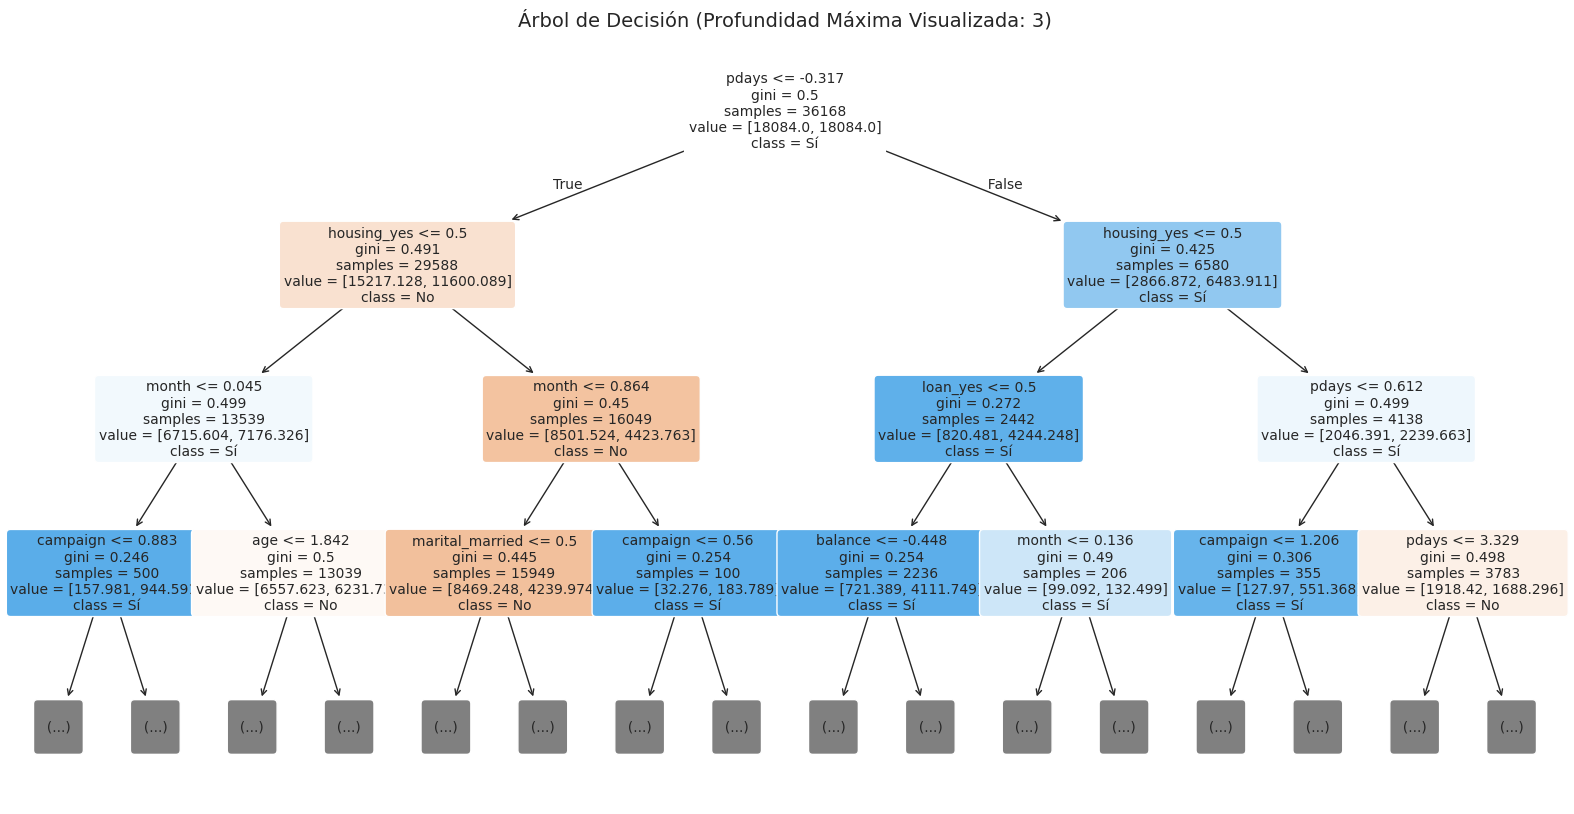

In [35]:
# Visualizar el árbol usando plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=new_columns,
    class_names=['No', 'Sí'],
    filled=True,
    rounded=True,
    max_depth=3,  # Limitar la profundidad para que sea legible
    fontsize=10
)
plt.title("Árbol de Decisión (Profundidad Máxima Visualizada: 3)", fontsize=14)
plt.show()

In [36]:
# Lista para almacenar los resultados
results = []

# Resultados Árbol de Decisión sin profundidad máxima
results.append({
    'Modelo': 'Árbol de Decisión sin profundidad máxima',
    'F1 Score': f1_score(y_test, y_test_pred_dt1),
    'Precisión': precision_score(y_test, y_test_pred_dt1),
    'Recall': recall_score(y_test, y_test_pred_dt1),
    'AUC-ROC': roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
})




---


Como no se impuso una profundidad máxima el modelo se amplio generando un árbol demasiado largo y complejo, poco interpretable. Pese a ser un árbol tan largo y complejo, el F1 score es bastante bajo (0.25). Además tiene una mala relación tiempo de cómputo-precisión por su complejidad y tamaño. La complejidad de este modelo sugiere que se está incurriendo en overfitting: capturando ruido y detalles específicos que no generalizan bien al conjunto de prueba.



---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra de prueba. ¿Considera que es un buen valor? Comente.

In [37]:
# Predicción sobre base de testeo
y_pred = dt_classifier.predict(X_test)

# Calculamos F1 Score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 score: {f1:.4f}")

F1 score: 0.2536


---


Ahora al utilizar el F1 Score medido con el test de prueba, vemos que el modelo lo hace considerablemente peor, un F1 Score de 0,25 resulta bajo y demuestra que modelo no es bueno, ya que no está capturando patrones relevantes en los datos.

---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [38]:
# Crear el árbol de decisión con profundidad máxima 16 y manejo de desbalance
dt_classifier = DecisionTreeClassifier(max_depth=16, class_weight='balanced', random_state=123)

# Entrenamos con set de entrenamiento
dt_classifier.fit(X_train, y_train)

# Predicción sobre el conjunto de prueba
y_test_pred_dt2 = dt_classifier.predict(X_test)

# Calcular el F1 Score en el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred_dt2)
print(f"F1 Score en el conjunto de prueba: {f1_test:.4f}")

F1 Score en el conjunto de prueba: 0.3058


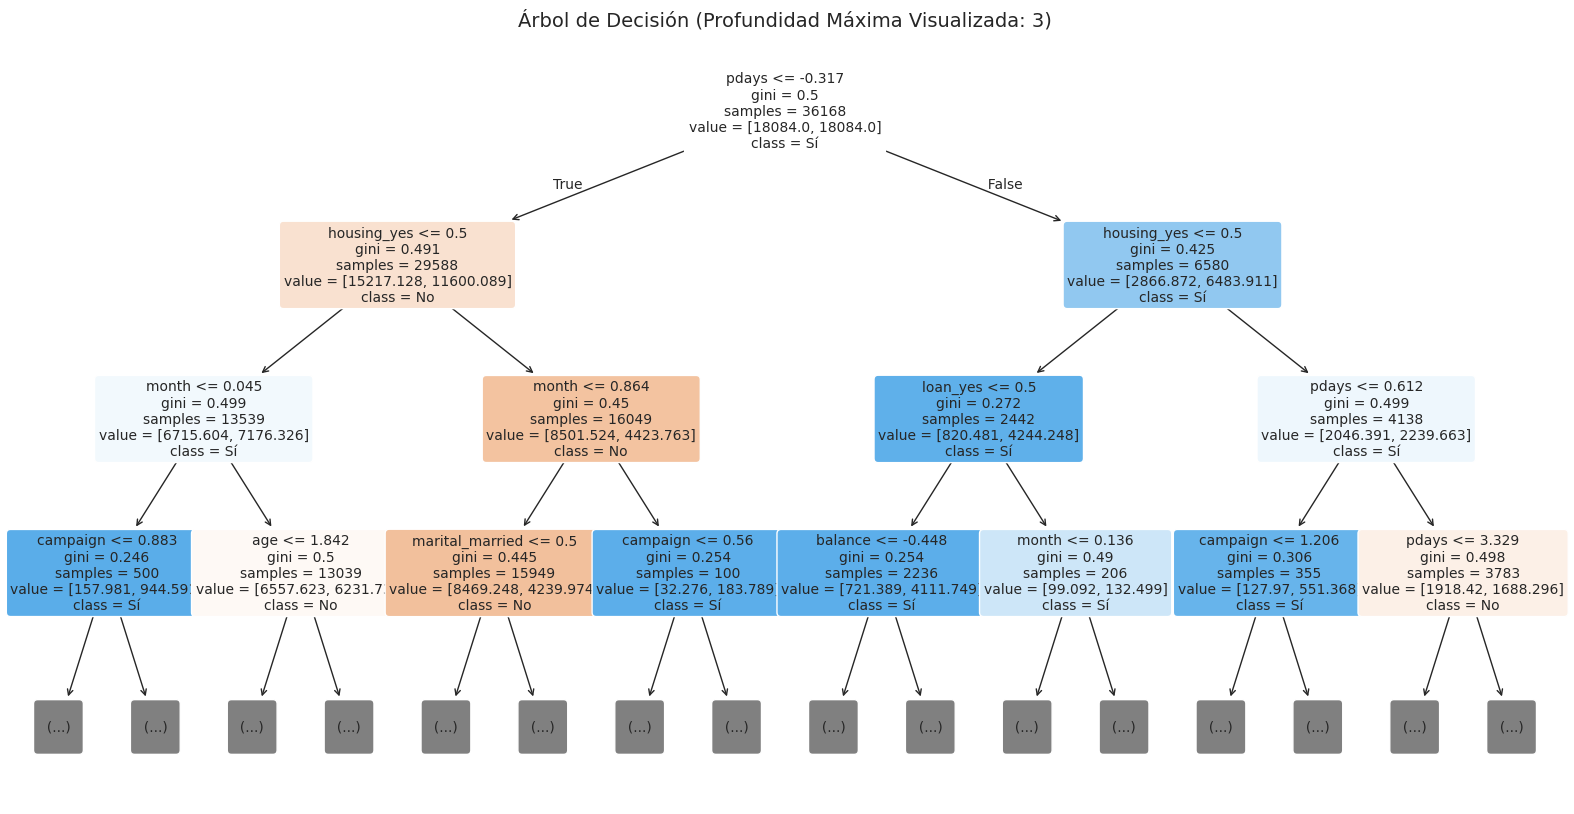

In [39]:
# Visualizar el árbol usando plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=new_columns,  # Nombres de las columnas transformadas (de la Pregunta 1.4)
    class_names=['No', 'Sí'],  # Clases de la variable objetivo
    filled=True,  # Colorear nodos según la clase mayoritaria
    rounded=True,  # Bordes redondeados para mejor visualización
    max_depth=3,  # Limitar la profundidad para que sea legible
    fontsize=10
)
plt.title("Árbol de Decisión (Profundidad Máxima Visualizada: 3)", fontsize=14)
plt.show()

In [40]:
# Resultados Árbol de Decisión con profundidad máxima 16
results.append({
    'Modelo': 'Árbol de Decisión sin profundidad máxima 16',
    'F1 Score': f1_score(y_test, y_test_pred_dt2),
    'Precisión': precision_score(y_test, y_test_pred_dt2),
    'Recall': recall_score(y_test, y_test_pred_dt2),
    'AUC-ROC': roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
})




---


Con una profundidad máxima de 16, este modelo introduce una regularización leve, lo que reduce el sobreajuste en comparación con el modelo sin límite. Sin embargo, el F1 Score (0.3058) sigue siendo bajo. Este modelo parece estar en un punto intermedio, evitando un sobreajuste extremo, pero aún no está lo suficientemente regularizado para optimizar el F1 Score.



---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [41]:
# Crear el árbol de decisión con profundidad máxima 8 y manejo de desbalance
dt_classifier = DecisionTreeClassifier(max_depth=8, class_weight='balanced', random_state=123)

# Entrenamos con set de entrenamiento
dt_classifier.fit(X_train, y_train)

# Predicción sobre el conjunto de prueba
y_test_pred_dt3 = dt_classifier.predict(X_test)

# Calcular el F1 Score en el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred_dt3)
print(f"F1 Score en el conjunto de prueba: {f1_test:.4f}")

F1 Score en el conjunto de prueba: 0.3678


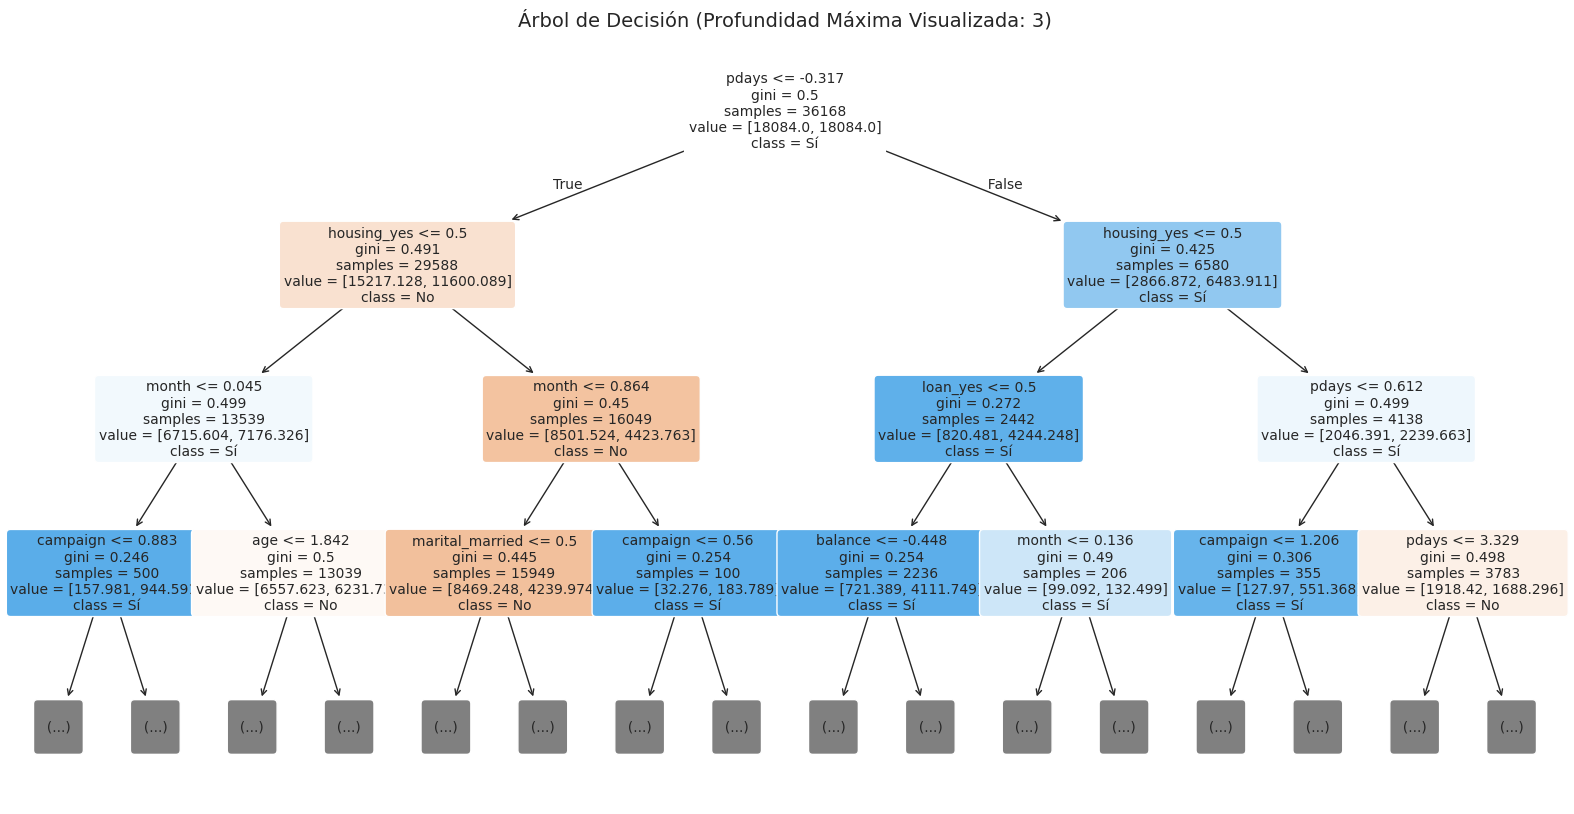

In [42]:
# Visualizar el árbol usando plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=new_columns,  # Nombres de las columnas transformadas (de la Pregunta 1.4)
    class_names=['No', 'Sí'],  # Clases de la variable objetivo
    filled=True,  # Colorear nodos según la clase mayoritaria
    rounded=True,  # Bordes redondeados para mejor visualización
    max_depth=3,  # Limitar la profundidad para que sea legible
    fontsize=10
)
plt.title("Árbol de Decisión (Profundidad Máxima Visualizada: 3)", fontsize=14)
plt.show()

In [43]:
# Resultados Árbol de Decisión con profundidad máxima 8
results.append({
    'Modelo': 'Árbol de Decisión sin profundidad máxima 8',
    'F1 Score': f1_score(y_test, y_test_pred_dt3),
    'Precisión': precision_score(y_test, y_test_pred_dt3),
    'Recall': recall_score(y_test, y_test_pred_dt3),
    'AUC-ROC': roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
})




---


Con una profundidad máxima de 8, este modelo aplica una regularización más fuerte, lo que previene el sobreajuste y mejora la generalización al conjunto de prueba. El F1 Score (0.3678) es el más alto entre los Árboles de Decisión.



---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

In [44]:
# Listas para almacenar los F1 Scores
f1_train_scores = []
f1_test_scores = []
depths = list(range(1, 21))  # Profundidades de 1 a 20

# Entrenar 20 árboles con max_depth de 1 a 20
for n in depths:
    # Crear y entrenar el árbol
    dt_classifier = DecisionTreeClassifier(max_depth=n, class_weight='balanced', random_state=123)
    dt_classifier.fit(X_train, y_train)

    # Calcular F1 Score en entrenamiento
    y_train_pred = dt_classifier.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred)
    f1_train_scores.append(f1_train)

    # Calcular F1 Score en prueba
    y_test_pred = dt_classifier.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred)
    f1_test_scores.append(f1_test)

# Imprimir resultados
print("F1 Scores para cada profundidad (max_depth):")
for n, f1_train, f1_test in zip(depths, f1_train_scores, f1_test_scores):
    print(f"max_depth={n}: F1 Train={f1_train:.4f}, F1 Test={f1_test:.4f}")

F1 Scores para cada profundidad (max_depth):
max_depth=1: F1 Train=0.2806, F1 Test=0.2879
max_depth=2: F1 Train=0.2625, F1 Test=0.2634
max_depth=3: F1 Train=0.3634, F1 Test=0.3595
max_depth=4: F1 Train=0.3990, F1 Test=0.3971
max_depth=5: F1 Train=0.4207, F1 Test=0.4035
max_depth=6: F1 Train=0.3964, F1 Test=0.3844
max_depth=7: F1 Train=0.4349, F1 Test=0.4072
max_depth=8: F1 Train=0.4070, F1 Test=0.3678
max_depth=9: F1 Train=0.4294, F1 Test=0.3736
max_depth=10: F1 Train=0.4480, F1 Test=0.3708
max_depth=11: F1 Train=0.4463, F1 Test=0.3555
max_depth=12: F1 Train=0.4660, F1 Test=0.3430
max_depth=13: F1 Train=0.4894, F1 Test=0.3343
max_depth=14: F1 Train=0.4798, F1 Test=0.3196
max_depth=15: F1 Train=0.5026, F1 Test=0.3045
max_depth=16: F1 Train=0.5283, F1 Test=0.3058
max_depth=17: F1 Train=0.5803, F1 Test=0.2968
max_depth=18: F1 Train=0.6208, F1 Test=0.2863
max_depth=19: F1 Train=0.6309, F1 Test=0.2842
max_depth=20: F1 Train=0.6534, F1 Test=0.2688


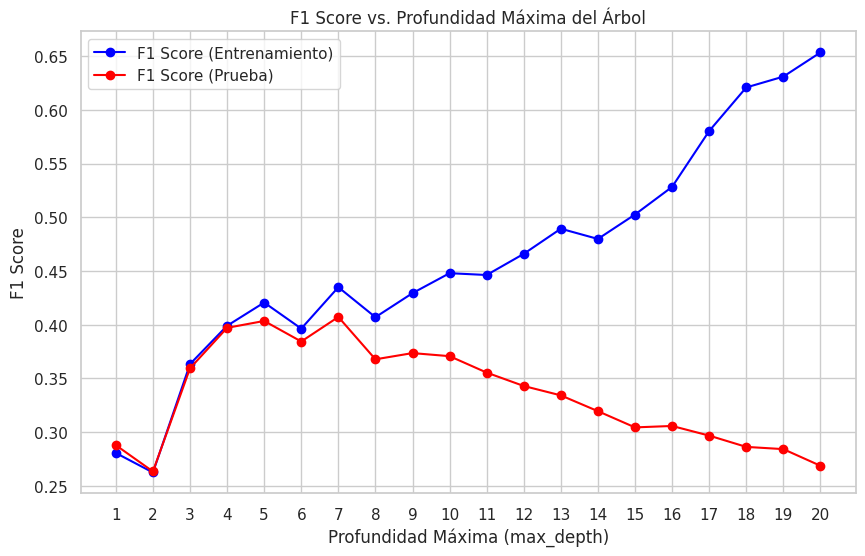

In [45]:
# Graficar F1 Scores (entrenamiento y prueba) contra max_depth
plt.figure(figsize=(10, 6))
plt.plot(depths, f1_train_scores, label='F1 Score (Entrenamiento)', marker='o', color='blue')
plt.plot(depths, f1_test_scores, label='F1 Score (Prueba)', marker='o', color='red')
plt.xlabel('Profundidad Máxima (max_depth)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Profundidad Máxima del Árbol')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()




---


Si para establecer cuál es el parámetro óptimo (n*) se utiliza el criterio de observar el valor que maximiza el F1 Score del set de testeo, se elige 7 como el número óptimo de profundidad máxima para el árbol de decisión.

Respecto al overfitting y generalización, en el gráfico podemos observar cómo el modelo comienza a sobreajustar a partir de la profundidad máxima de 7, mostrándose una creciente brecha entre el F1 score del set de entranemiento y el de testeo, mostrándose un claro sobreajuste en n=20 (F1 Train=0.6534, F1 Test=0.2688). En cuanto a la generalización, una profundidad intermedia, de 7, ofrece un mejor equilibrio entre aprender patrones relevantes en los datos y al mismo tiempo evitar sobreajuste. De esta manera, maximizando el desempeño en el set de testeo.



---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definir el espacio de hiperparámetros
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [2, 4]
}

# Inicializar listas para almacenar resultados
cv1_results = []
best_f1_cv = -1
best_params = None

# Realizar Cross Validation con K=5 para cada combinación
for n_est in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        for min_leaf in param_grid['min_samples_leaf']:
            # Crear y configurar el modelo con manejo de desbalance
            rf_classifier = RandomForestClassifier(
                n_estimators=n_est,
                max_depth=depth,
                min_samples_leaf=min_leaf,
                class_weight='balanced',
                random_state=123
            )

            # Calcular F1 Score promedio con validación cruzada (K=5)
            f1_cv_scores = cross_val_score(
                rf_classifier, X_train, y_train, cv=5, scoring='f1'
            )
            mean_f1_cv = f1_cv_scores.mean()
            std_f1_cv = f1_cv_scores.std()

            # Almacenar resultados
            cv1_results.append({
                'n_estimators': n_est,
                'max_depth': depth,
                'min_samples_leaf': min_leaf,
                'F1 CV Mean': mean_f1_cv,
                'F1 CV Std': std_f1_cv
            })

            # Actualizar la mejor combinación
            if mean_f1_cv > best_f1_cv:
                best_f1_cv = mean_f1_cv
                best_params = {
                    'n_estimators': n_est,
                    'max_depth': depth,
                    'min_samples_leaf': min_leaf
                }

# Convertir resultados a DataFrame para visualización
cv1_results_df = pd.DataFrame(cv1_results)
print("Resultados de Cross Validation (F1 Score promedio y desviación estándar):")
print(cv1_results_df)

# Imprimir la mejor combinación
print("\nMejor combinación de parámetros:", best_params)
print(f"Mejor F1 Score promedio (Cross Validation): {best_f1_cv:.4f}")

Resultados de Cross Validation (F1 Score promedio y desviación estándar):
    n_estimators  max_depth  min_samples_leaf  F1 CV Mean  F1 CV Std
0            100         10                 2    0.408793   0.009383
1            100         10                 4    0.406622   0.011157
2            100         50                 2    0.387951   0.017120
3            100         50                 4    0.425099   0.011662
4            100        100                 2    0.387951   0.017120
5            100        100                 4    0.425099   0.011662
6           1000         10                 2    0.408998   0.007887
7           1000         10                 4    0.409010   0.008020
8           1000         50                 2    0.389392   0.013246
9           1000         50                 4    0.432015   0.009637
10          1000        100                 2    0.389392   0.013246
11          1000        100                 4    0.432015   0.009637

Mejor combinación de parámet

In [47]:
# Entrenar el modelo final con la mejor combinación
best_rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight='balanced',
    random_state=123
)
best_rf_classifier.fit(X_train, y_train)

# Calcular F1 Score en el conjunto de prueba
y_test_pred_rf = best_rf_classifier.predict(X_test)
f1_test = f1_score(y_test, y_test_pred_rf)
print(f"F1 Score en el conjunto de prueba: {f1_test:.4f}")

# Resultados Random Forest
results.append({
    'Modelo': 'Random Forest',
    'F1 Score': f1_score(y_test, y_test_pred_rf),
    'Precisión': precision_score(y_test, y_test_pred_rf),
    'Recall': recall_score(y_test, y_test_pred_rf),
    'AUC-ROC': roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
})

F1 Score en el conjunto de prueba: 0.4203


### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [48]:
!pip install xgboost
from xgboost import XGBClassifier

# Calcular scale_pos_weight para manejar el desbalance
n_negative = len(y_train[y_train == 0])  # Número de "no" (0)
n_positive = len(y_train[y_train == 1])  # Número de "yes" (1)
scale_pos_weight = n_negative / n_positive
print(f"scale_pos_weight calculado: {scale_pos_weight:.2f}")

# Definir el espacio de hiperparámetros
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [5, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_leaves': [2, 4, 10]
}

# Inicializar listas para almacenar resultados
cv2_results = []
best_f1_cv = -1
best_params = None

# Realizar Cross Validation con K=5 para cada combinación
for n_est in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        for lr in param_grid['learning_rate']:
            for leaves in param_grid['max_leaves']:
                # Crear y configurar el modelo
                xgb_classifier = XGBClassifier(
                    n_estimators=n_est,
                    max_depth=depth,
                    learning_rate=lr,
                    max_leaves=leaves,
                    scale_pos_weight=scale_pos_weight,  # Manejo de desbalance
                    random_state=123,
                    eval_metric='logloss'  # Métrica para evitar warnings
                )

                # Calcular F1 Score promedio con validación cruzada (K=5)
                f1_cv_scores = cross_val_score(
                    xgb_classifier, X_train, y_train, cv=5, scoring='f1'
                )
                mean_f1_cv = f1_cv_scores.mean()
                std_f1_cv = f1_cv_scores.std()

                # Almacenar resultados
                cv2_results.append({
                    'n_estimators': n_est,
                    'max_depth': depth,
                    'learning_rate': lr,
                    'max_leaves': leaves,
                    'F1 CV Mean': mean_f1_cv,
                    'F1 CV Std': std_f1_cv
                })

                # Actualizar la mejor combinación
                if mean_f1_cv > best_f1_cv:
                    best_f1_cv = mean_f1_cv
                    best_params = {
                        'n_estimators': n_est,
                        'max_depth': depth,
                        'learning_rate': lr,
                        'max_leaves': leaves
                    }

# Convertir resultados a DataFrame para visualización
cv2_results_df = pd.DataFrame(cv2_results)
print("Resultados de Cross Validation (F1 Score promedio y desviación estándar):")
print(cv2_results_df)

# Imprimir la mejor combinación
print("\nMejor combinación de parámetros:", best_params)
print(f"Mejor F1 Score promedio (Cross Validation): {best_f1_cv:.4f}")

scale_pos_weight calculado: 7.55
Resultados de Cross Validation (F1 Score promedio y desviación estándar):
    n_estimators  max_depth  learning_rate  max_leaves  F1 CV Mean  F1 CV Std
0            100          5           0.05           2    0.332553   0.003185
1            100          5           0.05           4    0.376301   0.005605
2            100          5           0.05          10    0.399055   0.004587
3            100          5           0.10           2    0.344829   0.002122
4            100          5           0.10           4    0.380735   0.003759
5            100          5           0.10          10    0.399694   0.004954
6            100          5           0.50           2    0.362079   0.004572
7            100          5           0.50           4    0.394931   0.007669
8            100          5           0.50          10    0.387742   0.005693
9            100         50           0.05           2    0.332553   0.003185
10           100         50        

In [49]:
# Entrenar el modelo final con la mejor combinación
best_xgb_classifier = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    max_leaves=best_params['max_leaves'],
    scale_pos_weight=scale_pos_weight,
    random_state=123,
    eval_metric='logloss'
)
best_xgb_classifier.fit(X_train, y_train)

# Calcular F1 Score en el conjunto de prueba
y_test_pred_xgb = best_xgb_classifier.predict(X_test)
f1_test = f1_score(y_test, y_test_pred)
print(f"F1 Score en el conjunto de prueba: {f1_test:.4f}")

# Resultados XGBoost
results.append({
    'Modelo': 'XGBoost',
    'F1 Score': f1_score(y_test, y_test_pred_xgb),
    'Precisión': precision_score(y_test, y_test_pred_xgb),
    'Recall': recall_score(y_test, y_test_pred_xgb),
    'AUC-ROC': roc_auc_score(y_test, best_xgb_classifier.predict_proba(X_test)[:, 1])
})

F1 Score en el conjunto de prueba: 0.2688


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [50]:
from sklearn.naive_bayes import GaussianNB

# Crear el modelo GaussianNB con priors ajustados para manejar desbalance
nb_classifier = GaussianNB(priors=[0.5, 0.5])

# Entrenar el modelo con el conjunto de entrenamiento
nb_classifier.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_test_pred_nb = nb_classifier.predict(X_test)

# Calcular el F1 Score en el conjunto de prueba
f1_test = f1_score(y_test, y_test_pred_nb)
print(f"F1 Score en el conjunto de prueba: {f1_test:.4f}")

# Resultados Naïve Bayes (GaussianNB)
results.append({
    'Modelo': 'Naïve Bayes',
    'F1 Score': f1_score(y_test, y_test_pred_nb),
    'Precisión': precision_score(y_test, y_test_pred_nb),
    'Recall': recall_score(y_test, y_test_pred_nb),
    'AUC-ROC': roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
})

F1 Score en el conjunto de prueba: 0.2969




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

In [51]:
# Mostrar resultados
finalresults_df = pd.DataFrame(results)

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

print("Comparación de modelos (en conjunto de prueba):")
print(finalresults_df)

Comparación de modelos (en conjunto de prueba):
                                        Modelo  F1 Score  Precisión    Recall  \
0     Árbol de Decisión sin profundidad máxima  0.253630   0.259921  0.247637   
1  Árbol de Decisión sin profundidad máxima 16  0.305795   0.226898  0.468809   
2   Árbol de Decisión sin profundidad máxima 8  0.367824   0.284314  0.520794   
3                                Random Forest  0.420303   0.397306  0.446125   
4                                      XGBoost  0.405892   0.310466  0.586011   
5                                  Naïve Bayes  0.296919   0.197148  0.601134   

    AUC-ROC  
0  0.577240  
1  0.627580  
2  0.715251  
3  0.754404  
4  0.758630  
5  0.669614  





---


Comparando el rendimiento de los modelos, Random Forest y XGBoost son los mejores en desempeño general, presentando un F1 Score de 0.4204 y 0.4059, respectivamente), superando significativamente a los Árboles de Decisión y Naïve Bayes. En cuanto a los Árboles de Decisión, la regularización que impone un máximo de profundidad de 8 mejora de manera notable el desempeño relativo al modelo sin regularización.

Respecto al desbalance, éste afecta más a los modelos sin ajustes específicos (árboles de decisión), reduciendo su capacidad para identificar la clase minoritaria. Por otro lado, los ajustes como “class weight”, “scale pos weight” o “priors” permiten mejorar el recall, pero a costa de la precisión.



---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [52]:
import pandas as pd

# Importamos la base de datos
df_long = pd.read_csv('https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv')

# Dropeamos las columnas series code y country code
df_long = df_long.drop('Series Code', axis=1)
df_long = df_long.drop('Country Code', axis=1)

# Cambiamos el nombre a la columna año
df_long = df_long.rename(columns={'2023 [YR2023]': 'Year'})

# Transformamos de formato long a formato wide
df = df_long.pivot(index='Country Name', columns='Series Name', values='Year')


### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [53]:
# Como el reshape marcó country name como el índice, lo llevamos a una columna separada
df = df.reset_index()

# Dropeamos cada una de las categorías del dataset
df = df[df['Country Name'] != 'Africa Eastern and Southern']
df = df[df['Country Name'] != 'Africa Western and Central']
df = df[df['Country Name'] != 'Arab World']
df = df[df['Country Name'] != 'Caribbean small states']
df = df[df['Country Name'] != 'Central Europe and the Baltics']
df = df[df['Country Name'] != 'Early-demographic dividend']
df = df[df['Country Name'] != 'East Asia & Pacific']
df = df[df['Country Name'] != 'East Asia & Pacific (IDA & IBRD countries)']
df = df[df['Country Name'] != 'East Asia & Pacific (excluding high income)']
df = df[df['Country Name'] != 'Euro area']
df = df[df['Country Name'] != 'Europe & Central Asia']
df = df[df['Country Name'] != 'Europe & Central Asia (IDA & IBRD countries)']
df = df[df['Country Name'] != 'Europe & Central Asia (excluding high income)']
df = df[df['Country Name'] != 'European Union']
df = df[df['Country Name'] != 'Fragile and conflict affected situations']
df = df[df['Country Name'] != 'Heavily indebted poor countries (HIPC)']
df = df[df['Country Name'] != 'High income']
df = df[df['Country Name'] != 'IBRD only']
df = df[df['Country Name'] != 'IDA & IBRD total']
df = df[df['Country Name'] != 'IDA blend']
df = df[df['Country Name'] != 'IDA only']
df = df[df['Country Name'] != 'IDA total']
df = df[df['Country Name'] != 'Late-demographic dividend']
df = df[df['Country Name'] != 'Latin America & Caribbean']
df = df[df['Country Name'] != 'Latin America & Caribbean (excluding high income)']
df = df[df['Country Name'] != 'Latin America & the Caribbean (IDA & IBRD countries)']
df = df[df['Country Name'] != 'Least developed countries: UN classification']
df = df[df['Country Name'] != 'Low & middle income']
df = df[df['Country Name'] != 'Low income']
df = df[df['Country Name'] != 'Lower middle income']
df = df[df['Country Name'] != 'Middle East & North Africa']
df = df[df['Country Name'] != 'Middle East & North Africa (IDA & IBRD countries)']
df = df[df['Country Name'] != 'Middle East & North Africa (excluding high income)']
df = df[df['Country Name'] != 'Middle income']
df = df[df['Country Name'] != 'North America']
df = df[df['Country Name'] != 'Not classified']
df = df[df['Country Name'] != 'OECD members']
df = df[df['Country Name'] != 'Other small states']
df = df[df['Country Name'] != 'Pacific island small states']
df = df[df['Country Name'] != 'Post-demographic dividend']
df = df[df['Country Name'] != 'Pre-demographic dividend']
df = df[df['Country Name'] != 'Small states']
df = df[df['Country Name'] != 'South Asia']
df = df[df['Country Name'] != 'South Asia (IDA & IBRD)']
df = df[df['Country Name'] != 'Sub-Saharan Africa']
df = df[df['Country Name'] != 'Sub-Saharan Africa (IDA & IBRD countries)']
df = df[df['Country Name'] != 'Sub-Saharan Africa (excluding high income)']
df = df[df['Country Name'] != 'Upper middle income']
df = df[df['Country Name'] != 'World']

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [54]:
import numpy as np

# Reemplazamos los .. por NA
df = df.replace('..', np.nan)

# Mantenemos los nombres para no perderlos
non_numeric = df[['Country Name']]

# Cnvertimos las variables a numericas
numeric = df.drop(columns=['Country Name']).apply(pd.to_numeric, errors='coerce')

# Combinamos de nuevo nombres con variables numericas
df = pd.concat([non_numeric, numeric], axis=1)

# Estadísticas descriptivas
df.describe()

<ipython-input-54-1958318895>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('..', np.nan)


Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
count,149.000000,161.000000,158.000000,149.000000,145.000000,195.000000,147.000000,157.000000,152.000000,0.0,149.000000,205.000000,192.000000,149.000000,22.000000,161.000000
mean,2.726255,35.005284,45.398868,24.136526,14.275881,3.241160,11.352849,10.234009,5.732781,NaN,42.098438,60.914241,5.096570,9.476862,2.624425,20.583359
std,7.416283,23.550764,33.331007,23.862474,23.215387,6.641153,13.507894,11.534976,7.703914,NaN,29.236666,24.978469,11.628976,15.470820,4.899022,16.870115
min,0.000000,0.935706,1.108109,0.079874,0.000000,-20.111576,0.000000,0.043145,0.008135,NaN,0.210353,0.121224,0.000034,0.000000,0.000002,0.663447
25%,0.343928,13.309551,23.637110,8.338115,0.498740,1.168088,2.226174,2.681207,1.319000,NaN,15.347126,43.902677,0.244645,1.353868,0.046153,7.784412
50%,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,NaN,37.251121,65.682415,0.942470,3.138350,0.232860,15.739129
75%,2.120083,53.862266,56.494967,32.790842,15.770449,4.987486,16.841983,12.745838,7.163361,NaN,68.665103,82.370504,3.269713,8.391231,1.419763,27.632283
max,63.703068,95.860793,212.530618,98.210416,95.516439,75.061377,72.315489,61.766896,55.672826,NaN,94.990393,97.770966,96.949670,76.471800,15.578989,86.950670


### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

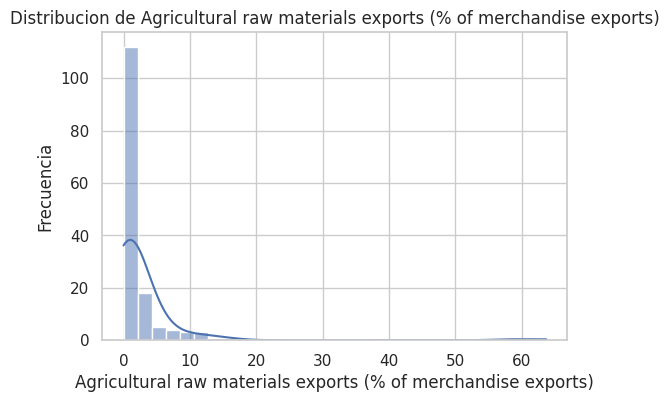

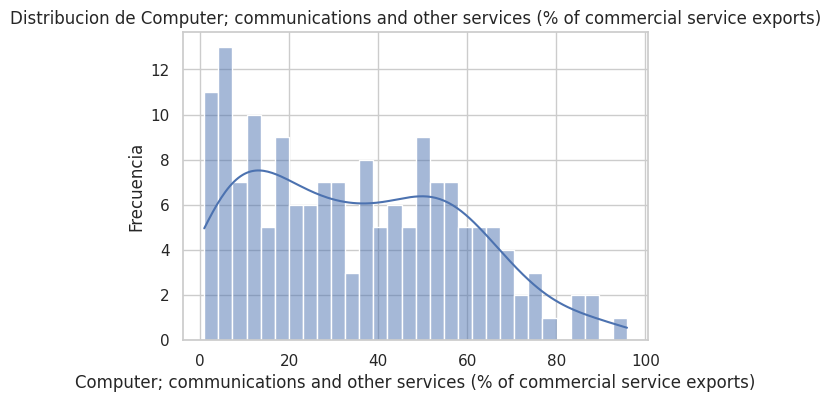

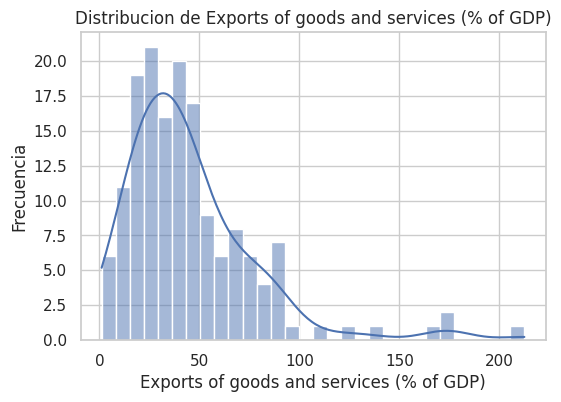

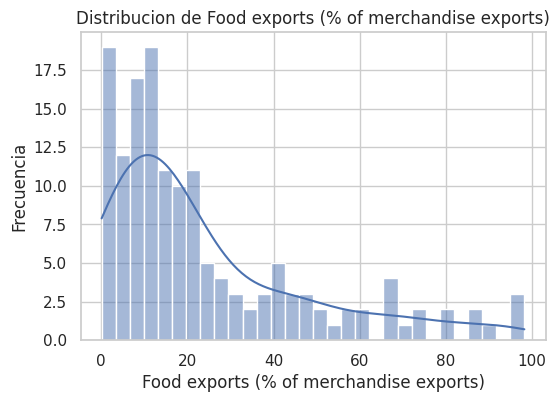

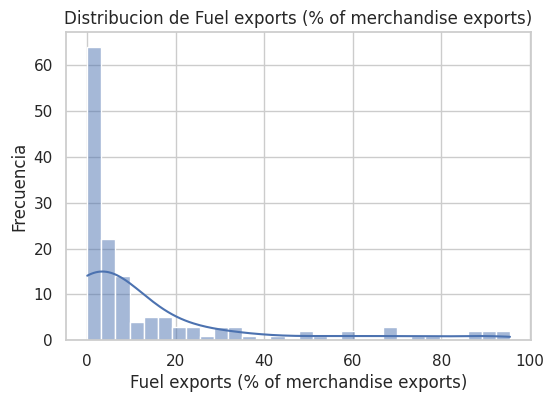

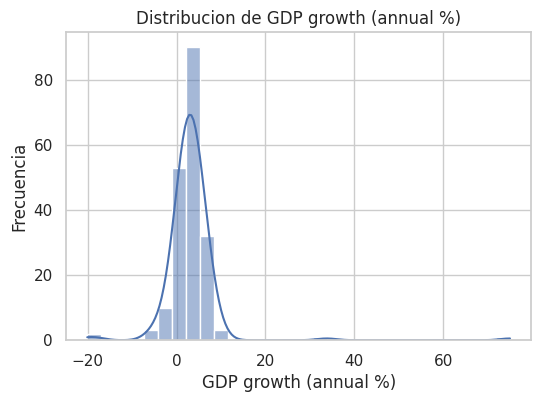

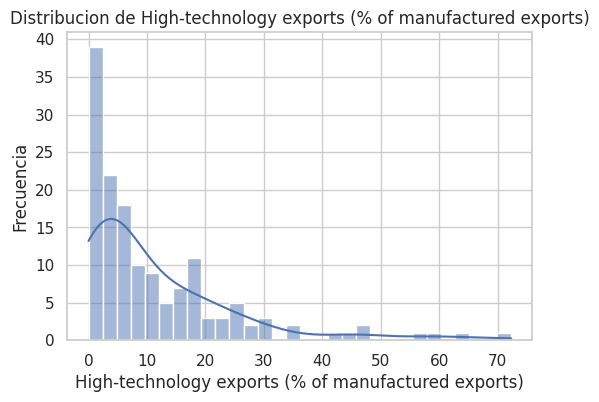

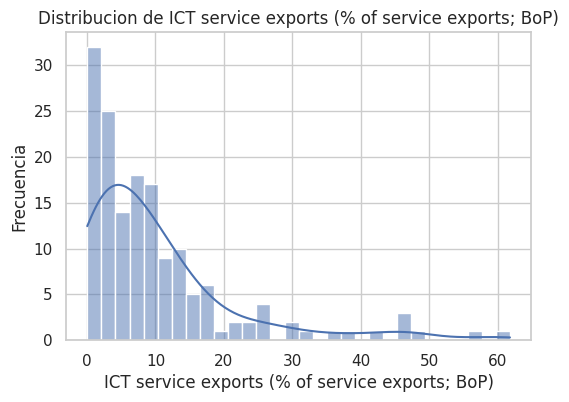

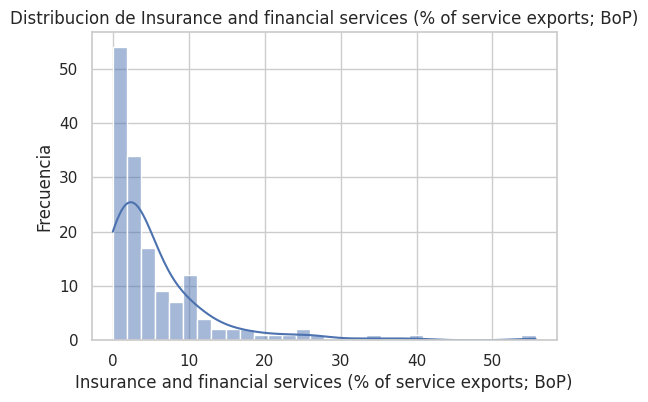

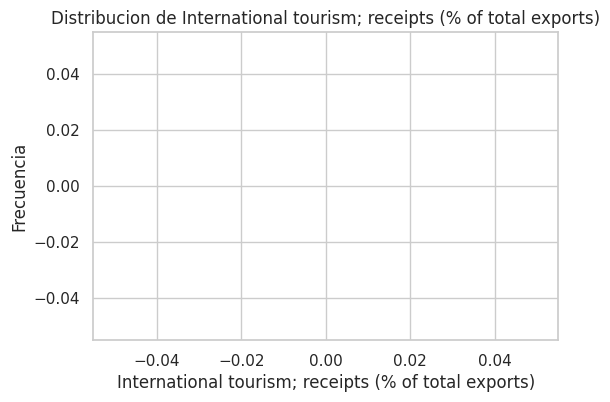

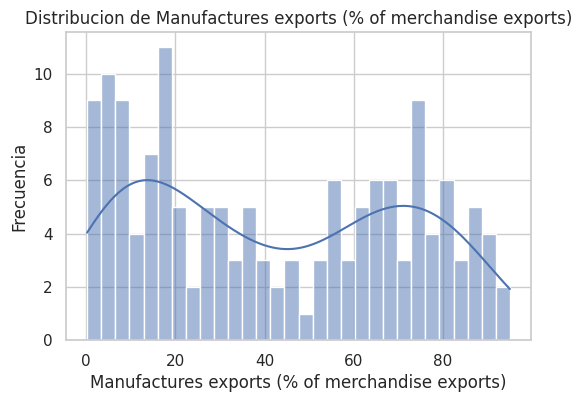

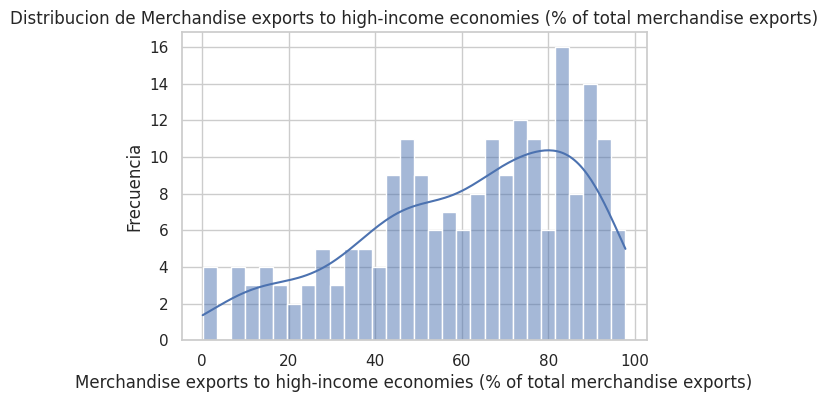

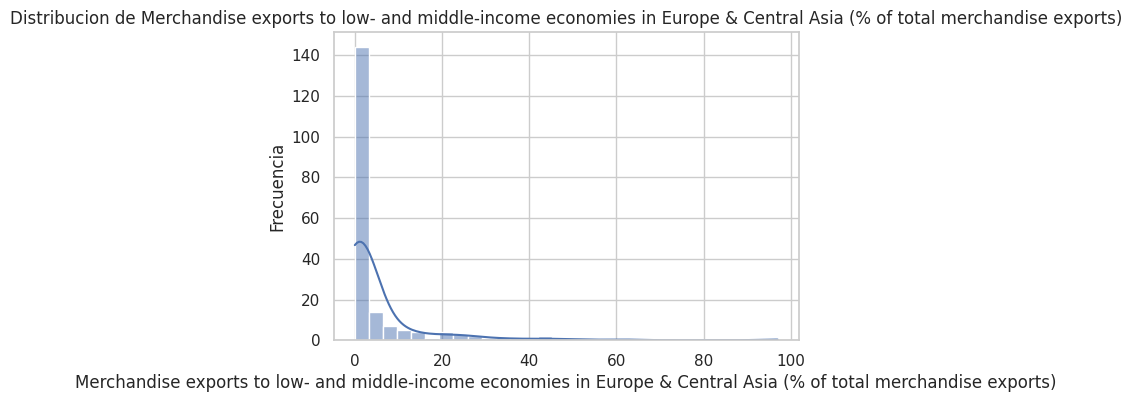

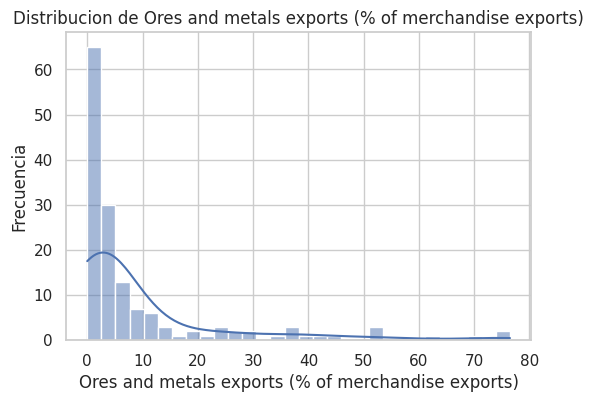

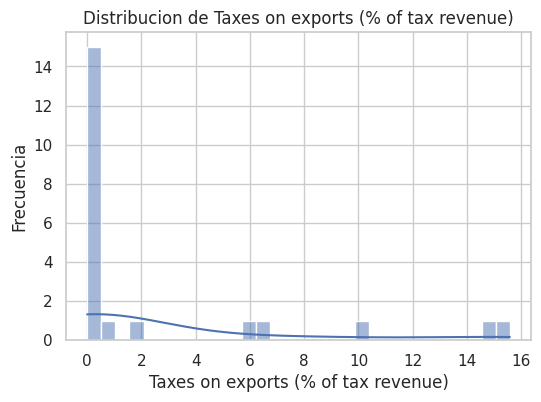

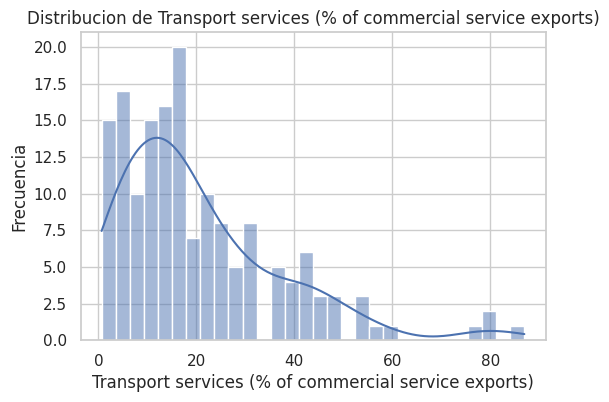

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

numericas = ['Agricultural raw materials exports (% of merchandise exports)',
             'Computer; communications and other services (% of commercial service exports)',
             'Exports of goods and services (% of GDP)', 'Food exports (% of merchandise exports)',
             'Fuel exports (% of merchandise exports)', 'GDP growth (annual %)',
             'High-technology exports (% of manufactured exports)', 'ICT service exports (% of service exports; BoP)',
             'Insurance and financial services (% of service exports; BoP)',
             'International tourism; receipts (% of total exports)',
             'Manufactures exports (% of merchandise exports)',
             'Merchandise exports to high-income economies (% of total merchandise exports)',
             'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
             'Ores and metals exports (% of merchandise exports)',
             'Taxes on exports (% of tax revenue)',
             'Transport services (% of commercial service exports)']

for col in numericas:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribucion de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()




---


Durante 2023, las exportaciones de materiales agrícolas estas fueron minoritarias representando en la mayor parte de los casos menos del 10% del total de exportaciones.

Las exportaciones de servicios de computación y comunicaciones parece no tener un sesgo ni una concentración clara, aunque hay claros puntos de mayor frecuencia como entre 0 y 10% y entre 35-50%.

Por su parte, las exportaciones totales de bienes y servicios representan en la mayor parte de la muestra entre un 15% y 35% del PIB del país.

En cuanto a las exportaciones de alimentos, la concentración se da entre 0 y 20% del total de exportaciones de bienes. Sin embargo, esta variable tiene una cola larga teniendo valores extremos cercanos al 100%.

De manera similar, las exportaciones de combustibles se concentran entre 0 y 5% contando con más de la mitad de las observaciones entre 0 y 15% de las exportaciones de bienes, pero mostrando una alta varianza, con valores cercanos al 100% del total de exportaciones.

A pesar de algunos outliers, el crecimiento del PIB anual está bien concentrado alrededor del 0 con una curtosis bastante alta en torno a este valor.

Las exportaciones de alta tecnología se concentran por debajo del 20% de las exportaciones de bienes totales, con valores extremos cercanos a 70%.

Las exportaciones de servicios de tecnologia e información (ICT) muestran una distribución similar al de las exportaciones de alta tecnolocía, pero en este caso con una mayor concentración por debajo de 20% de las exportacione de servicios y sobre todo por debajo de 10%.
Algo muy similar sucede con las exportaciones de servicios de seguros y servicios financieros, con una menor dispersión incluso, concentrandose mayormente entre 0% y 10% de las exportaciones de sevicios totales.

Los ingresos por turismo internacional es una variable sin observaciones por lo que se queda en blanco el gráfico.

La distribución de las exportacines no parece tener una concentración particular, sino más bien parece que existen múltiples tipos de países que exportan manufacturas como un porcentaje alto o bajo con respecto a sus exportaciones totales.

Las exportaciones de mercancías parece estar muy concentrada hacia países de ingresos altos, dado que la distribución de los exportaciones a estos países tiene un sesgo a la derecha concentrandose entre 80% y 100% del total de exportaciones.

Complemento de esto último, las exportaciones de mercancías a países de bajos ingresos se concentra sobre todo en la parte más baja de la distribución cercano a 0% del total de exportaciones.

Las exportaciones de metales y rocas crudas (ores) a pesar de tener una disperción alta, se concentra en 5 de cada 10 países entre 0 y 10% de total de exportaciones de bienes.

A pesar de ser una variable con muchas observaciones faltantes, la tasa de impuesto a las exportaciones se concnetran en torno a 0% pero en territorio positivo.

Las exportaciones de servicios de transporte muestran una concentración alrededor del 20% del total de exportaciones de servicios, con un rango amplio entre 0% y 30% aproximadamente.



---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


In [56]:
# Analizamos cuantos missing hay en cada variable
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

# Dropear variables con exceso de missings
df = df.drop('International tourism; receipts (% of total exports)', axis=1)
df = df.drop('Taxes on exports (% of tax revenue)', axis=1)

# Sustituir por mediana en variables con pocos missings
bajos = ['Merchandise exports to high-income economies (% of total merchandise exports)',
         'GDP growth (annual %)', 'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
         'Fuel exports (% of merchandise exports)', 'High-technology exports (% of manufactured exports)',
         'Agricultural raw materials exports (% of merchandise exports)', 'Food exports (% of merchandise exports)',
         'Ores and metals exports (% of merchandise exports)',
         'Insurance and financial services (% of service exports; BoP)',
         'ICT service exports (% of service exports; BoP)', 'Exports of goods and services (% of GDP)',
         'Computer; communications and other services (% of commercial service exports)',
         'Transport services (% of commercial service exports)']

for var in bajos:
    median_val = df[var].median()
    df[var] = df[var].fillna(median_val)

# Sustituir por manufacturas
    prom = df['Manufactures exports (% of merchandise exports)'].mean()
    df['Manufactures exports (% of merchandise exports)'] = df['Manufactures exports (% of merchandise exports)'].fillna(prom)
    df['Manufactures_missing'] = df['Manufactures exports (% of merchandise exports)'].isna().astype(int)

    # Comprobamos que no queden missings
    missing_percent = df.isna().mean() * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    print(missing_percent)

Series Name
International tourism; receipts (% of total exports)                                                                 100.000000
Taxes on exports (% of tax revenue)                                                                                   89.861751
Fuel exports (% of merchandise exports)                                                                               33.179724
High-technology exports (% of manufactured exports)                                                                   32.258065
Manufactures exports (% of merchandise exports)                                                                       31.336406
Ores and metals exports (% of merchandise exports)                                                                    31.336406
Agricultural raw materials exports (% of merchandise exports)                                                         31.336406
Food exports (% of merchandise exports)                                                     

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

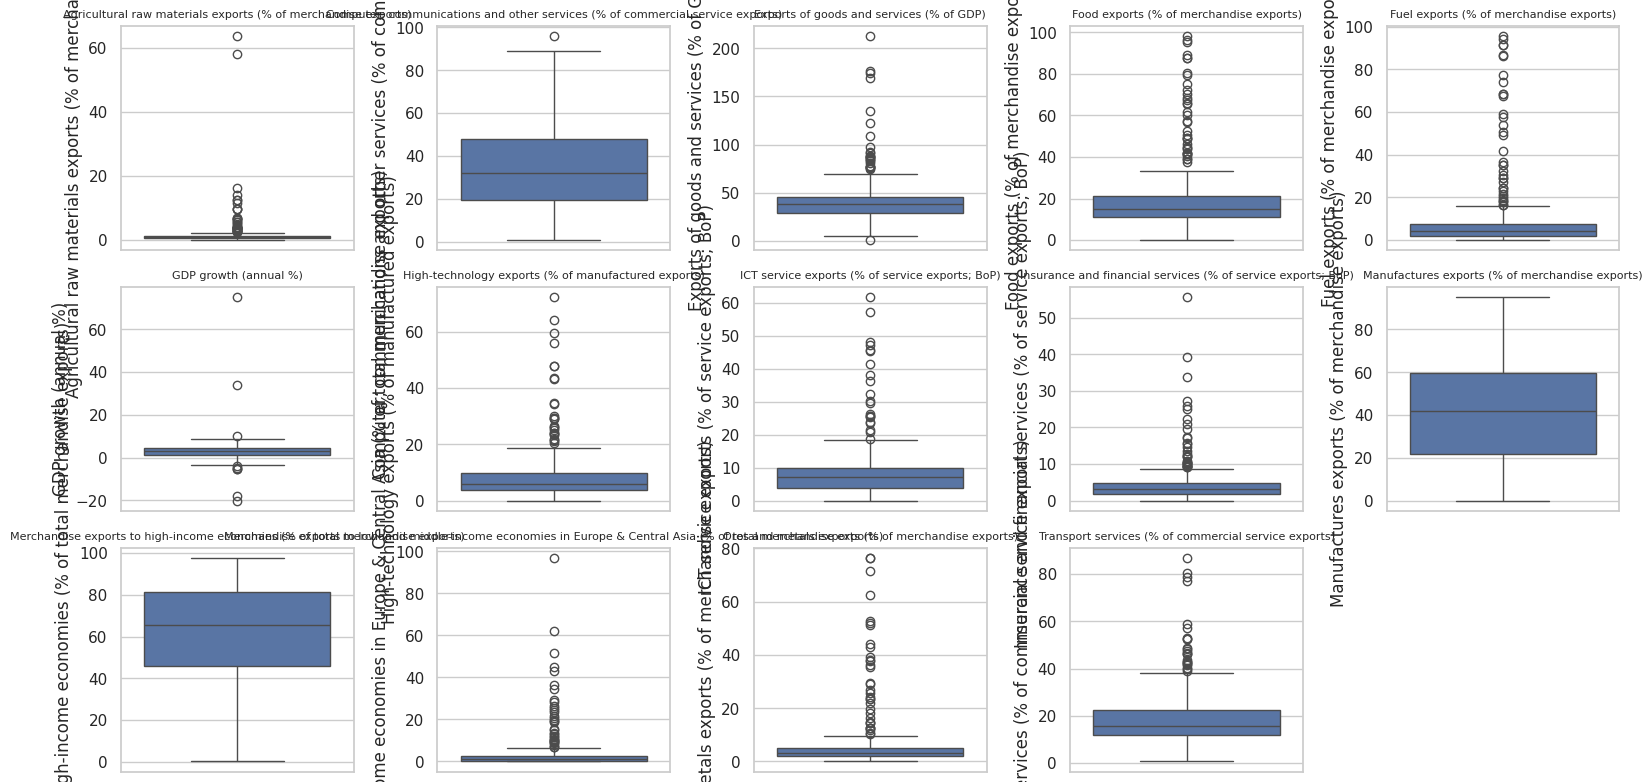

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = ['Agricultural raw materials exports (% of merchandise exports)',
             'Computer; communications and other services (% of commercial service exports)',
             'Exports of goods and services (% of GDP)', 'Food exports (% of merchandise exports)',
             'Fuel exports (% of merchandise exports)', 'GDP growth (annual %)',
             'High-technology exports (% of manufactured exports)', 'ICT service exports (% of service exports; BoP)',
             'Insurance and financial services (% of service exports; BoP)',
             'Manufactures exports (% of merchandise exports)',
             'Merchandise exports to high-income economies (% of total merchandise exports)',
             'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
             'Ores and metals exports (% of merchandise exports)', 'Transport services (% of commercial service exports)',
             'Manufactures_missing']

fig, axes = plt.subplots(3,5, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(numericas):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(var, fontsize=8)

# Ocultar el subplot vacío (sexto subplot)
axes[14].set_visible(False)

plt.tight_layout()
plt.show()

In [58]:
# Eliminamos 4 outliers de crecimiento real que están alejados del resto, por encima y por debajo
df = df[df['GDP growth (annual %)'] <= 30 ]
df = df[df['GDP growth (annual %)'] >= -17]

# Eliminamos valores extremos de exportaciones agrícolas
df = df[df['Agricultural raw materials exports (% of merchandise exports)'] <= 50]

# Eliminamos valores extremos de exportaciones países de bajos ingresos
df = df[df['Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)'] <= 62]

# Eliminamos valores extremos de servicios financieros
df = df[df['Insurance and financial services (% of service exports; BoP)'] <= 40]




---


Aunque existen múltiples outliers para casi todas las variables, para la mayor parte toleramos de que existan valores alejados de sus promedios por la alta varianza que existe a nivel global en términos de exportaciones y que nos gustaría mantener precisamente para determinar cuales de esos países con alta depedencia en un sector o producto en sus exportaciones podrá sufrir más las medidas arancelarias.

A pesar de esto, en exportaciones a países de bajos ingresos y exportaciones agrícolas si parecen existir valores extremos fuera de la masa de datos, estos outliers serán eiminados.

Del mismo modo, los dos casos con crecimiento del PIB extremadamente por encima y por debajo del resto de la muestra mundial podría distorzionar demasiado la muestra por lo que también serán eliminados.

Por último, hay un caso muy extremo para las exportaciones de seguros y servicios financieros que parece demasiado alejado del resto de valores. Como se enfoca en servicio optamos por eliminar esta observación también producto de que los aranceles afectarán a las mercancías y no tanto a los servicios como tal, por lo que eliminar esta fila no deberá traer cambios en nuestros resultados.

En total se perderan 8 observaciones, pero se tendrá una muestra más limpia de los datos que queremos estimar.


---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [59]:
# Creamos variables para poder separar países
df['Primarios'] = (df['Agricultural raw materials exports (% of merchandise exports)'] + df['Ores and metals exports (% of merchandise exports)'] + df['Food exports (% of merchandise exports)'])
df['Manufacturas'] = 100-df['Primarios']

# Crear dummy para economías primarias
df['Primaria'] = (df['Primarios'] > df['Manufacturas']).astype(int)

# Crear dummy para economías industriales
df['Industrial'] = (df['Manufacturas'] > df['Primarios']).astype(int)

# Crear dummy para economías enfocadas en tecnologías
prom_hte = df['High-technology exports (% of manufactured exports)'].mean()
df['Tecnologia'] = (df['High-technology exports (% of manufactured exports)'] > prom_hte).astype(int)

# Crear dummy para economías terciarias
df['Tic'] = ((df['Computer; communications and other services (% of commercial service exports)'] + df['ICT service exports (% of service exports; BoP)'] ) > (df['Insurance and financial services (% of service exports; BoP)'] + df['Transport services (% of commercial service exports)'])).astype(int)

# Estandarizar variables
from sklearn.preprocessing import StandardScaler
numericas = ['Agricultural raw materials exports (% of merchandise exports)',
             'Computer; communications and other services (% of commercial service exports)',
             'Exports of goods and services (% of GDP)', 'Food exports (% of merchandise exports)',
             'Fuel exports (% of merchandise exports)', 'GDP growth (annual %)',
             'High-technology exports (% of manufactured exports)', 'ICT service exports (% of service exports; BoP)',
             'Insurance and financial services (% of service exports; BoP)',
             'Manufactures exports (% of merchandise exports)',
             'Merchandise exports to high-income economies (% of total merchandise exports)',
             'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
             'Ores and metals exports (% of merchandise exports)', 'Transport services (% of commercial service exports)']

# Definimos las funciones
scaler = StandardScaler()

# Estandarizar las columnas
df[numericas] = scaler.fit_transform(df[numericas])

# Dropeamos variables que no serán utilizadas
df = df.drop('Primarios', axis=1)
df = df.drop('Manufacturas', axis=1)

Se optó por crear 4 dummies para captuar 4 características de los países a nivel mundial:

Primaria: economías que basan sus exportaciones en bienes primarios como mineros, alimentos y agrícolas.

Industrial: economía que basan sus exportaciones en bienes manufacturados y no primarios.

Tecnología: economías que exportan más bienes de alta tecnología que la mediana mundial.

Tic: economías que basan sus ventas de servicios en tecnología, información y comunicaciones.

Posterior a esto, se estandarizaron las variables a utilizar en el proyecto.

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



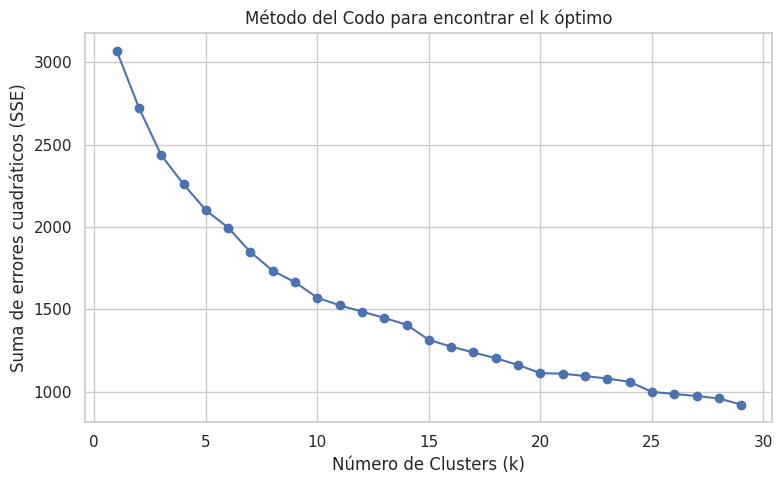

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Nos quedamos solo con las variables numericas
df_kmeans = df.select_dtypes(include='number')

# Computamos los valores para los posibles 30 valores de k estimando el SSE
sse = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_kmeans)
    sse.append(kmeans.inertia_)

# Graficamos la curva de SSE para los valores
plt.figure(figsize=(8, 5))
plt.plot(range(1, 30), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de errores cuadráticos (SSE)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.grid(True)
plt.tight_layout()
plt.show()

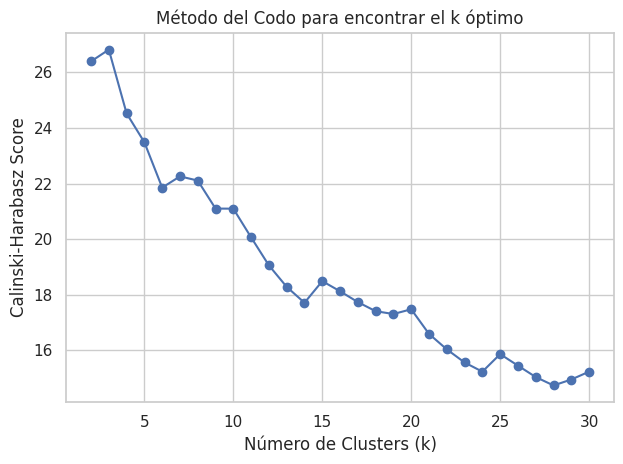

In [61]:
# Computamos los valores para los posibles 30 valores de k estimando el Calinski-Harabasz
from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=123)
    labels = kmeans.fit_predict(df_kmeans)
    score = calinski_harabasz_score(df_kmeans, labels)
    scores.append(score)

plt.plot(range(2, 31), scores, marker='o')
plt.title("Método del Codo para encontrar el k óptimo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.grid(True)
plt.tight_layout()
plt.show()




---


La curva estimando la suma de error cuadrático nos arroja que el k óptimo es 5, porque es el que presenta el punto más bajo de error cuadrático justo antes de la curva aplanarse, es decir, el k más alto que todavía genera caída en el error.

Como constraste, se realizó la curva utilizando el método de Calinski-Harabasz, con resultado similares: el número óptimo de k, que genera un mayor incremento del índice es 5.



---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


In [63]:
# Estimamos correlaciones
corr_matrix = df_kmeans.corr()

# Presentamos las varibales que más correlacionan con las exportaciones de bienes
target_var = 'Exports of goods and services (% of GDP)'
correlations = corr_matrix[target_var].abs().sort_values(ascending=False)
print(correlations)

Series Name
Exports of goods and services (% of GDP)                                                                             1.000000
High-technology exports (% of manufactured exports)                                                                  0.412289
Tecnologia                                                                                                           0.275445
Manufactures exports (% of merchandise exports)                                                                      0.262828
Insurance and financial services (% of service exports; BoP)                                                         0.163863
Agricultural raw materials exports (% of merchandise exports)                                                        0.157280
Transport services (% of commercial service exports)                                                                 0.125799
Primaria                                                                                                  

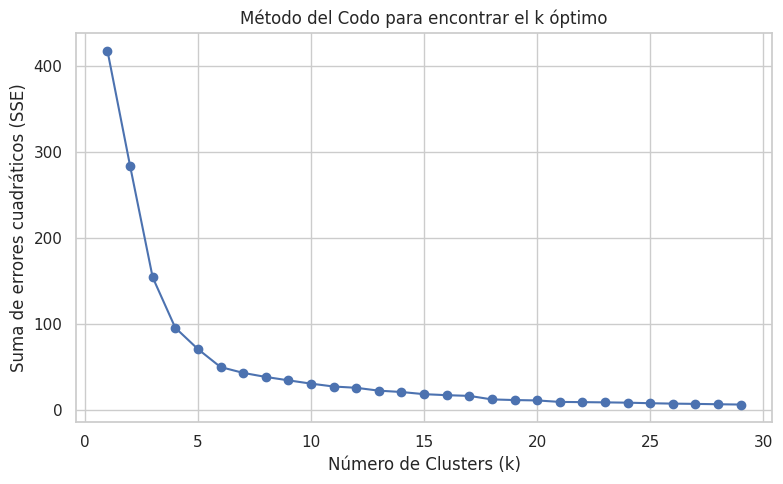

In [64]:
# Probamos con las 2 principales categorías
df_prueba1 = df_kmeans[['High-technology exports (% of manufactured exports)',
'Manufactures exports (% of merchandise exports)']]

sse = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_prueba1)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 30), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de errores cuadráticos (SSE)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.grid(True)
plt.tight_layout()
plt.show()

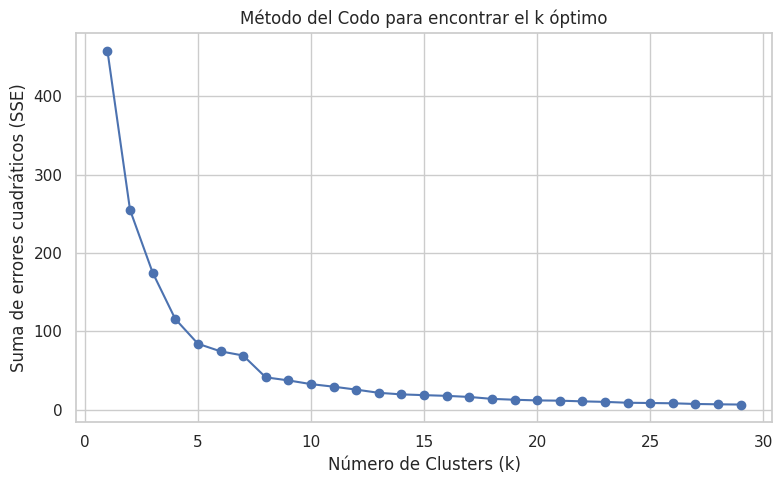

In [65]:
# Probamos con las 3 principales categorías
df_prueba2 = df_kmeans[['High-technology exports (% of manufactured exports)',
'Tecnologia','Manufactures exports (% of merchandise exports)']]

sse = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_prueba2)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 30), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de errores cuadráticos (SSE)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.grid(True)
plt.tight_layout()
plt.show()

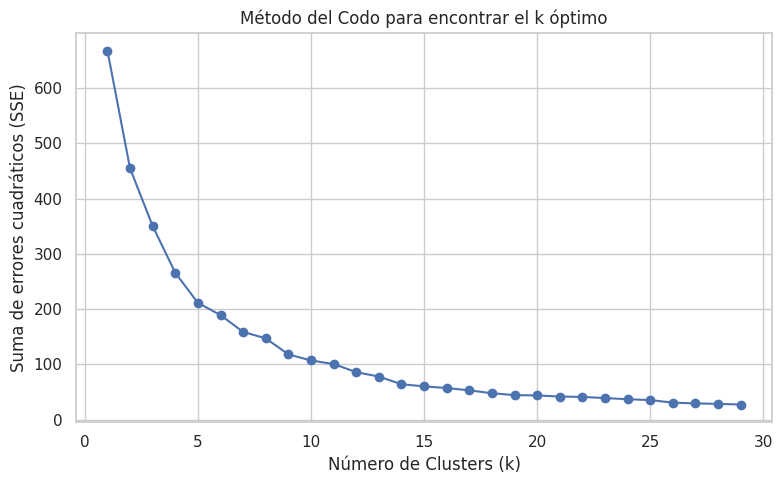

In [66]:
# Probamos con las 4 principales categorías
df_prueba3 = df_kmeans[['High-technology exports (% of manufactured exports)',
'Tecnologia','Manufactures exports (% of merchandise exports)',
'Insurance and financial services (% of service exports; BoP)']]

sse = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_prueba3)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 30), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de errores cuadráticos (SSE)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.grid(True)
plt.tight_layout()
plt.show()

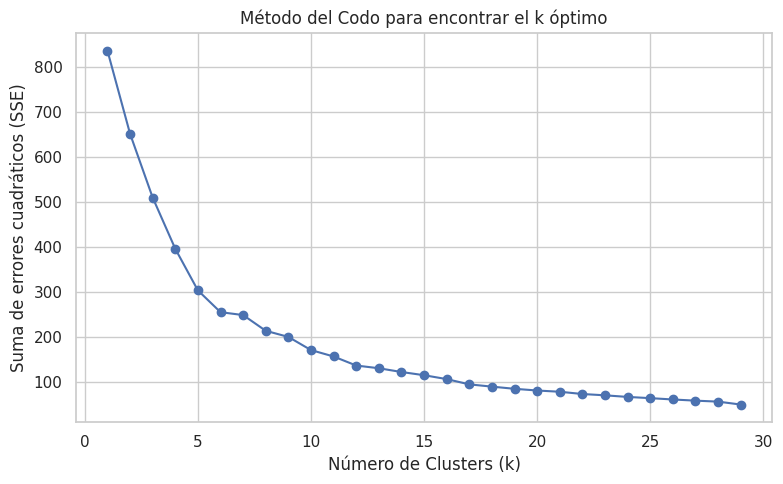

In [67]:
# Probamos con las 4 principales categorías sin dummies creadas
df_prueba4 = df_kmeans[['High-technology exports (% of manufactured exports)',
'Manufactures exports (% of merchandise exports)', 'Insurance and financial services (% of service exports; BoP)',
'Agricultural raw materials exports (% of merchandise exports)']]

sse = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_prueba4)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 30), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de errores cuadráticos (SSE)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.grid(True)
plt.tight_layout()
plt.show()

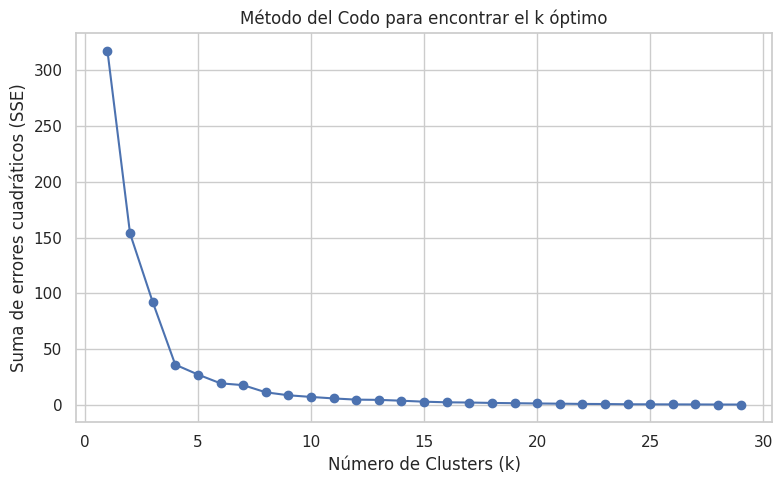

In [68]:
# Probamos solo con dummies y la categorías más importante
df_prueba5 = df_kmeans[['High-technology exports (% of manufactured exports)',
'Tecnologia', 'Primaria',
'Industrial']]

sse = []

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_prueba5)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 30), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de errores cuadráticos (SSE)')
plt.title('Método del Codo para encontrar el k óptimo')
plt.grid(True)
plt.tight_layout()
plt.show()

---


En base a los resultados planteados parece ser que a medida que incrementamos la cantidad de variables, el k óptimo incrementa y la caída del SSE se reduce para valores mayores: modelos de menos variables son mejores porque requieren de menores valores de k y acumulan errores menores.

Otra característica interesante es que las dummies creadas en el inciso 2.6 no parecen aportar tanto valor: cuando se eliminan (combinación 4) el k óptimo no se ve alterado, mientras que si son incluidas, aún con la variable de mayor correlación (combinación) el modelo arroja un SSE alto y un k óptimo muy por encima del resto de modelos.


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


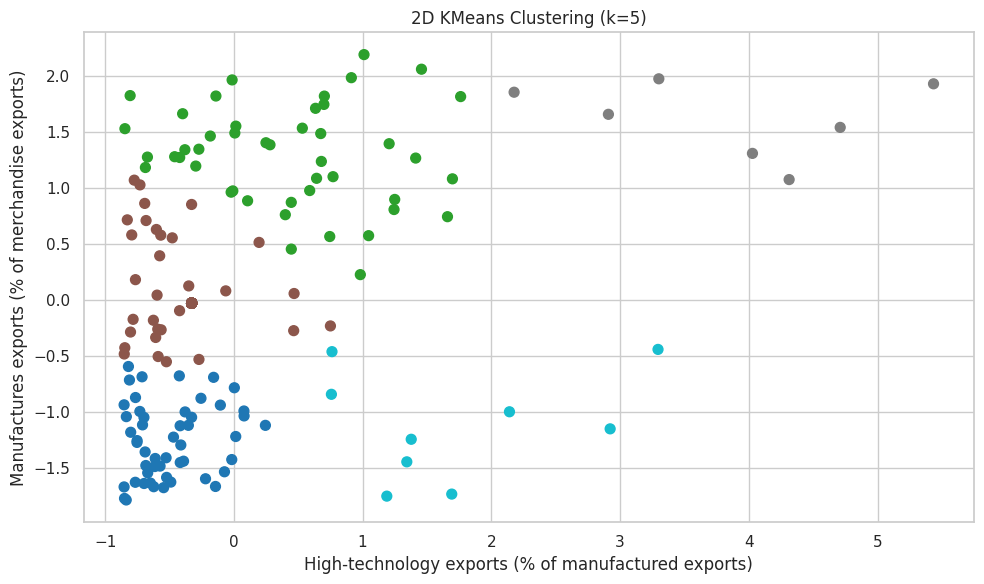

In [69]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Selección de variables (combinación 2)
X = df_kmeans[['High-technology exports (% of manufactured exports)', 'Manufactures exports (% of merchandise exports)']].copy()

# Ajuste del modelo KMeans
kmeans = KMeans(n_clusters=5, random_state=123, n_init=10)
df_kmeans['cluster'] = kmeans.fit_predict(X)

# Gráfico 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X.iloc[:, 0], X.iloc[:, 1],
    c=df_kmeans['cluster'], cmap='tab10', s=50
)

plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('2D KMeans Clustering (k=5)')
plt.tight_layout()
plt.show()

---


El grupo más afectado será el de países que se encuentran en más de 1 y 2 desviaciones estándar en exportaciones de manufacturas y entre 1 y 5 desviación estándar de exportaciones de alta tecnología (gris en el gráfico). Entre estos países están: Singapur, Malasia y Filipinas.

El segundo que podría sufrir más la guerra comercial serían los que se encuentran entre -1 y 1 desviación estándar de exportaciones tecnologicas, y una alta tasa de exportación de manufacturas, más de 0.5 desviaciones estándar (verde en el gráfico). Entre estos países están: Hungría, Corea del Sur y Croacia.

El tercer grupo sería el de en medio en el gráfico (color marrón) que son países con un menor nivel de exportaciones de manufacturas, entre -0.5 y 1 desviación estándar y una baja exportación de manufacturas de alta tecnología, menos de 1 desviación estándar. Entre estos países están: Albania, Egipto y Namibia.

El segundo grupo de países con menor riesgo son los que tienen poca exposición a exportaciones de manufacturas, entre -0.5 y -1.5 desviaciones estándar, aunque tengan una exposición alta a exportaciones de alta tecnología (azul celeste en el gráfico). Entre estos países están: Australia, Angola e Islandia.

El grupo de menor exposición a la guerra comercial sería el que tienen pocas exportaciones de manufacturas, entre -0.5 y -1.5 desviaciones estándar respecto a la media y pocas exportaciones de bienes de alta tecnología, entre 0 y -1 desviaciones estándar respecto a la media (grupo en color azul). Entre estos países están: Bahréin, Repúlica Centroafricana y Bolivia.


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


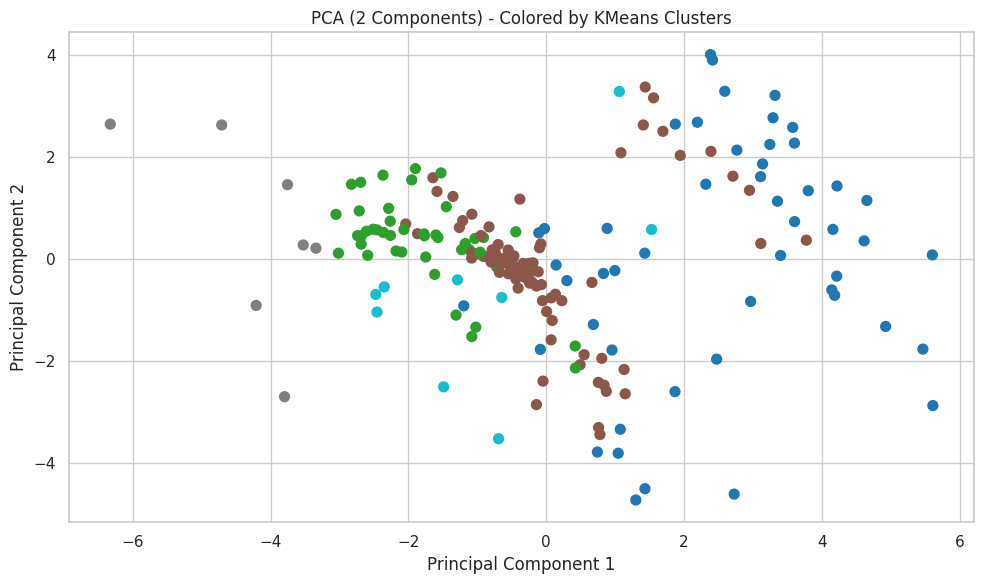

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecciona las variables numéricas
X = df_kmeans.select_dtypes(include='number')

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agregar componentes al DataFrame
df_kmeans['PCA1'] = X_pca[:, 0]
df_kmeans['PCA2'] = X_pca[:, 1]

# Graficar los componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(df_kmeans['PCA1'], df_kmeans['PCA2'], c=df_kmeans['cluster'], cmap='tab10', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA (2 Components) - Colored by KMeans Clusters')
plt.tight_layout()
plt.show()

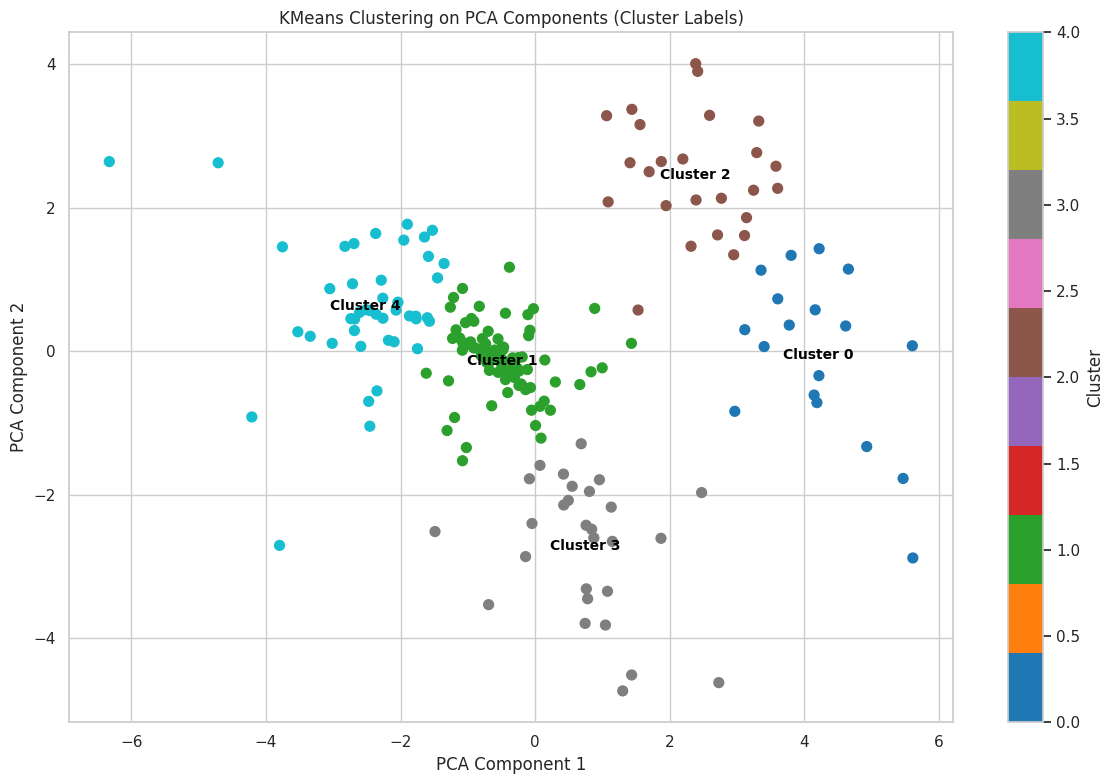

In [71]:
kmeans_pca = KMeans(n_clusters=5, random_state=123, n_init=10)
df_kmeans['cluster_pca'] = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(12, 8))

# Scatter plot con colores por cluster
scatter = plt.scatter(
    df_kmeans['PCA1'],
    df_kmeans['PCA2'],
    c=df_kmeans['cluster_pca'],
    cmap='tab10',
    s=50
)

centroids = kmeans_pca.cluster_centers_

for i, (x, y) in enumerate(centroids):
    plt.text(x, y, f'Cluster {i}', fontsize=10, weight='bold', color='black', ha='center', va='center')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering on PCA Components (Cluster Labels)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
# Mostrar importancia en PC1 y PC2 de cada variable
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

print("Variables más importantes en PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

print("\nVariables más importantes en PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(10))

Variables más importantes en PC1:
Series Name
Primaria                                                                         0.376751
Industrial                                                                       0.376751
Manufactures exports (% of merchandise exports)                                  0.359382
Food exports (% of merchandise exports)                                          0.279140
High-technology exports (% of manufactured exports)                              0.272435
Computer; communications and other services (% of commercial service exports)    0.262058
Ores and metals exports (% of merchandise exports)                               0.246651
cluster                                                                          0.242552
Tecnologia                                                                       0.234778
Tic                                                                              0.196162
Name: PC1, dtype: float64

Variables más importantes e

---


El modelo con 5 clusters parece separar de manera clara los 5 grandes grupos, aunque con mucha diferencia entre cada uno. Los clusters 3 y 4 tienen una dispersión relativamente alta con respecto a los clusters 1 y 2 que parecen ser mucho más compactos.

Para identificar los componentes correctamente, sorprendentemente resultan ser las dummies de primaria e industrial para el componente 1  y exportaciones de servicios de computación, comunicación y otros para el caso del componente 2.


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

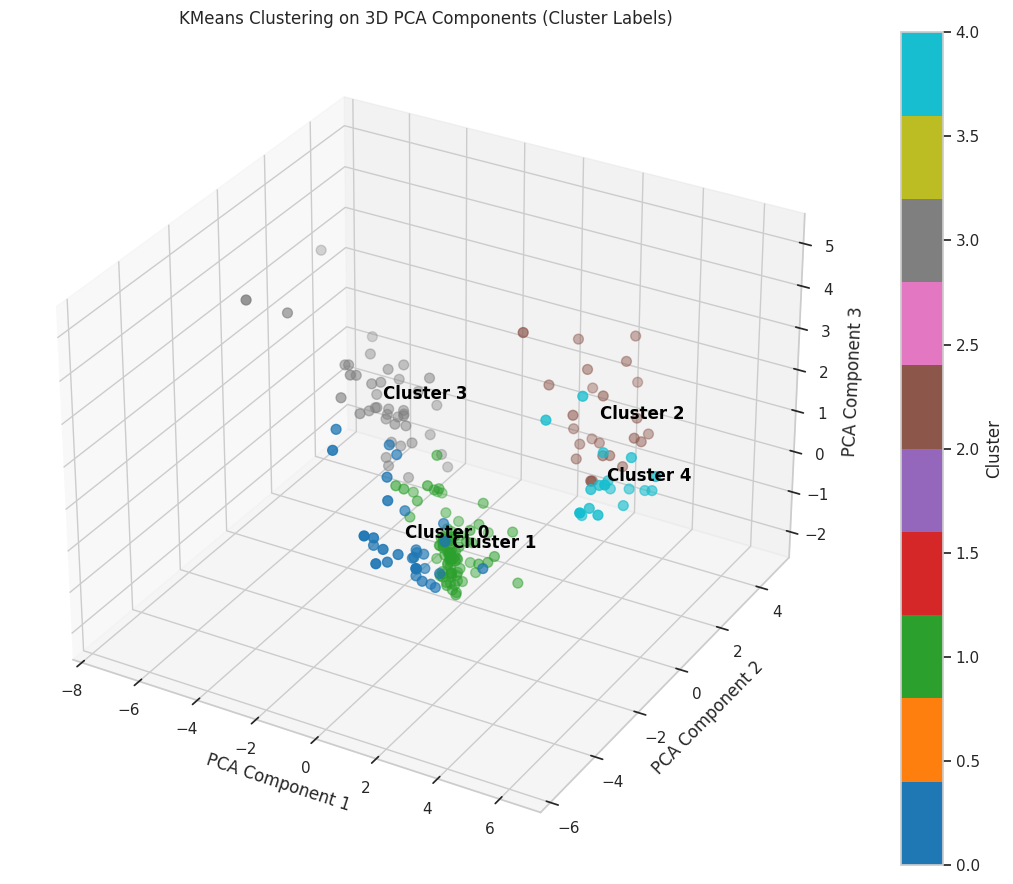

In [73]:
# Selecciona las variables numéricas
X = df_kmeans.select_dtypes(include='number')

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Agregar componentes al DataFrame
df_kmeans['PCA1'] = X_pca[:, 0]
df_kmeans['PCA2'] = X_pca[:, 1]
df_kmeans['PCA3'] = X_pca[:, 2]

# Aplicar KMeans con los 3 componentes
kmeans_pca = KMeans(n_clusters=5, random_state=123, n_init=10)
df_kmeans['cluster_pca'] = kmeans_pca.fit_predict(X_pca)

# Graficar en 3D con colores según cluster
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_kmeans['PCA1'], df_kmeans['PCA2'], df_kmeans['PCA3'],
    c=df_kmeans['cluster_pca'], cmap='tab10', s=50
)

# Centroides en el espacio PCA
centroids = kmeans_pca.cluster_centers_

# Etiquetar centroides
for i, (x, y, z) in enumerate(centroids):
    ax.text(x, y, z, f'Cluster {i}', fontsize=12, weight='bold', color='black')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('KMeans Clustering on 3D PCA Components (Cluster Labels)')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

In [74]:
# Mostrar importancia de variables en los 3 componentes
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=X.columns
)

print("Variables más importantes en PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

print("\nVariables más importantes en PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(10))

print("\nVariables más importantes en PC3:")
print(loadings['PC3'].abs().sort_values(ascending=False).head(10))

Variables más importantes en PC1:
Series Name
PCA1                                                                             0.420268
Primaria                                                                         0.317948
Industrial                                                                       0.317948
Manufactures exports (% of merchandise exports)                                  0.312790
cluster_pca                                                                      0.264176
High-technology exports (% of manufactured exports)                              0.252607
Food exports (% of merchandise exports)                                          0.237835
Computer; communications and other services (% of commercial service exports)    0.232910
Tecnologia                                                                       0.224752
Ores and metals exports (% of merchandise exports)                               0.212674
Name: PC1, dtype: float64

Variables más importantes e

---


A pesar de perder cierta información producto de que los cluster 1 y 4 están muy cerca, pero la separación se asemeja bastante a la previa.

En este caso para identificar el primer principal componente resultan más importantes las dummies de primaria e industrial, mientras que para el segundo componente son tecnología y exportaciones de alta tecnología. Por último para el tercer componente resultan más importantes las exportaciones de servicios de transporte y la dummy Tic de países exportadores de servicios de tecnología e información.



---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [75]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


In [76]:
# Agregar columna de continente al DataFrame
df['Continente'] = df['Country Name'].map(country_continent_mapping)

# Ver lista de países que no se mapearon
df.loc[df['Continente'].isna(), 'Country Name'].unique()

array(['Afghanistan', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Bermuda', 'Bhutan', 'British Virgin Islands',
       'Burundi', 'Cambodia', 'Cameroon', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Comoros',
       'Congo Rep.', "Cote d'Ivoire", 'Cuba', 'Curacao', 'Djibouti',
       'Dominica', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
       'Faroe Islands', 'Fiji', 'French Polynesia', 'Gabon', 'Gibraltar',
       'Greenland', 'Grenada', 'Guam', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Iran', 'Iraq', 'Isle of Man', 'Israel', 'Jamaica', 'Kiribati',
       "Korea Dem. People's Rep.", 'Kosovo', 'Kuwait', 'Kyrgyz Republic',
       'Lao PDR', 'Lebanon', 'Libya', 'Liechtenstein', 'Madagascar',
       'Malawi', 'Maldives', 'Mali', 'Marshall Islands', 'Micronesia',
       'Monaco', 'Mongolia', 'Myanmar', 'Nauru', 'Nepal', 'New Caledonia',
       'Nigeria', 'Nor

### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


Columnas en df: ['Country Name', 'Agricultural raw materials exports (% of merchandise exports)', 'Computer; communications and other services (% of commercial service exports)', 'Exports of goods and services (% of GDP)', 'Food exports (% of merchandise exports)', 'Fuel exports (% of merchandise exports)', 'GDP growth (annual %)', 'High-technology exports (% of manufactured exports)', 'ICT service exports (% of service exports; BoP)', 'Insurance and financial services (% of service exports; BoP)', 'Manufactures exports (% of merchandise exports)', 'Merchandise exports to high-income economies (% of total merchandise exports)', 'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)', 'Ores and metals exports (% of merchandise exports)', 'Transport services (% of commercial service exports)', 'Manufactures_missing', 'Primaria', 'Industrial', 'Tecnologia', 'Tic', 'Continente']


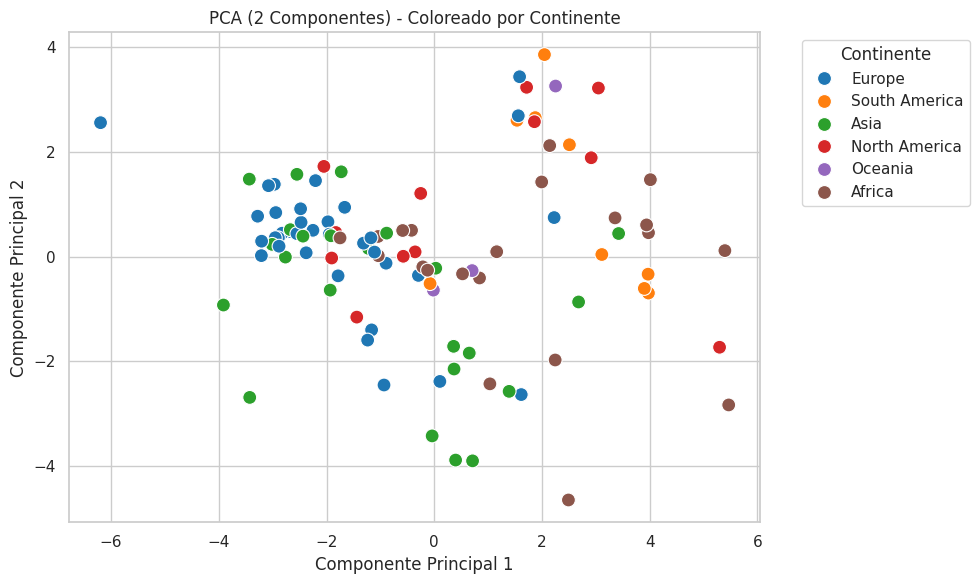

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Verificar las columnas disponibles en el DataFrame
print("Columnas en df:", df.columns.tolist())

# Definir las columnas numéricas
columnas_numericas = [
    'Agricultural raw materials exports (% of merchandise exports)',
    'Computer; communications and other services (% of commercial service exports)',
    'Exports of goods and services (% of GDP)',
    'Food exports (% of merchandise exports)',
    'Fuel exports (% of merchandise exports)',
    'GDP growth (annual %)',
    'High-technology exports (% of manufactured exports)',
    'ICT service exports (% of service exports; BoP)',
    'Insurance and financial services (% of service exports; BoP)',
    'Manufactures exports (% of merchandise exports)',
    'Merchandise exports to high-income economies (% of total merchandise exports)',
    'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
    'Ores and metals exports (% of merchandise exports)',
    'Transport services (% of commercial service exports)',
    'Manufactures_missing',
    'Primaria', 'Industrial', 'Tecnologia', 'Tic'
]

# Seleccionar columnas numéricas
X = df[columnas_numericas]

# Estandarizar las variables
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_escalado)

# Crear un DataFrame con resultados de PCA y Continente
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Continente': df['Continente']
})

# Crear scatterplot coloreado por Continente
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Continente',
    data=pca_df, palette='tab10', s=100
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA (2 Componentes) - Coloreado por Continente')
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [78]:
# Calcular la varianza explicada
varianza_explicada = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {varianza_explicada[0]:.2%}")
print(f"Varianza explicada por PC2: {varianza_explicada[1]:.2%}")
print(f"Varianza total explicada: {sum(varianza_explicada):.2%}")

Varianza explicada por PC1: 22.53%
Varianza explicada por PC2: 13.20%
Varianza total explicada: 35.73%


In [79]:
# Mostrar la importancia de las variables en PC1 y PC2
cargas = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=columnas_numericas
)
print("\nVariables más importantes en PC1:")
print(cargas['PC1'].abs().sort_values(ascending=False).head(5))
print("\nVariables más importantes en PC2:")
print(cargas['PC2'].abs().sort_values(ascending=False).head(5))


Variables más importantes en PC1:
Primaria                                                                         0.382978
Industrial                                                                       0.382978
Manufactures exports (% of merchandise exports)                                  0.371205
Food exports (% of merchandise exports)                                          0.288960
Computer; communications and other services (% of commercial service exports)    0.279597
Name: PC1, dtype: float64

Variables más importantes en PC2:
Tic                                                                              0.410089
Transport services (% of commercial service exports)                             0.375636
Food exports (% of merchandise exports)                                          0.365738
Computer; communications and other services (% of commercial service exports)    0.327203
Fuel exports (% of merchandise exports)                                          0.324900
Name

---


El gráfico confirma visualmente que los perfiles de exportación varían por continente, pero las similitudes económicas (industriales vs. primarias, servicios vs. bienes) son más determinantes que la geografía pura. La baja varianza explicada (35.73%) sugiere que un análisis con más componentes podría ofrecer una separación más clara, pero el PCA de 2 dimensiones es útil para identificar tendencias generales de exposición a una guerra comercial.



---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



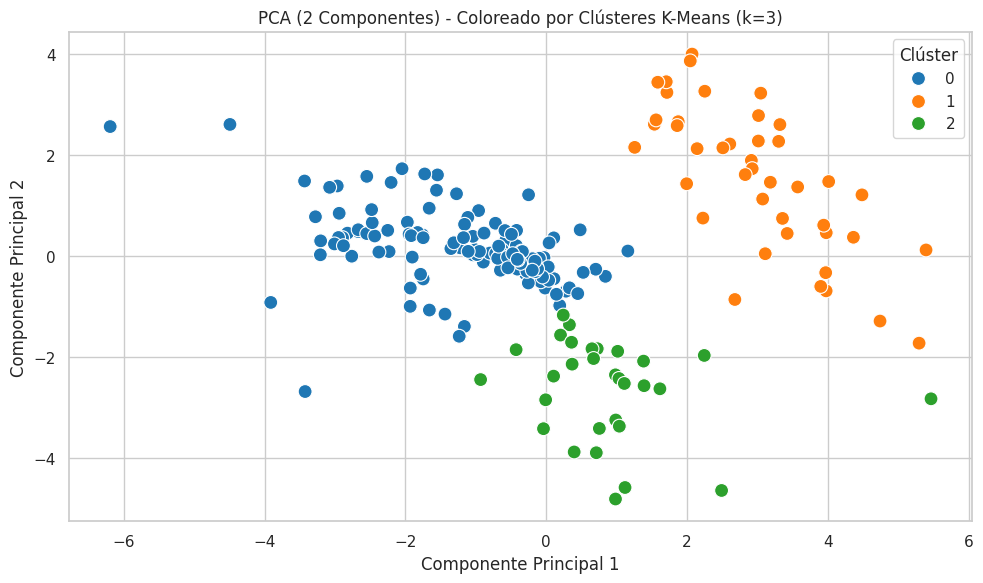

In [80]:
# Seleccionar columnas numéricas
X = df[columnas_numericas]

# Estandarizar las variables
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_escalado)

# Aplicar K-Means con 3 clústeres
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Crear un DataFrame con resultados de PCA y clústeres
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': clusters
})

# Crear scatterplot coloreado por clúster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster',
    data=pca_df, palette='tab10', s=100
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA (2 Componentes) - Coloreado por Clústeres K-Means (k=3)')
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()

In [81]:
# Mostrar la importancia de las variables en PC1 y PC2 para interpretar los clústeres
cargas = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=columnas_numericas
)
print("\nVariables más importantes en PC1:")
print(cargas['PC1'].abs().sort_values(ascending=False).head(5))
print("\nVariables más importantes en PC2:")
print(cargas['PC2'].abs().sort_values(ascending=False).head(5))


Variables más importantes en PC1:
Primaria                                                                         0.382978
Industrial                                                                       0.382978
Manufactures exports (% of merchandise exports)                                  0.371205
Food exports (% of merchandise exports)                                          0.288960
Computer; communications and other services (% of commercial service exports)    0.279597
Name: PC1, dtype: float64

Variables más importantes en PC2:
Tic                                                                              0.410089
Transport services (% of commercial service exports)                             0.375636
Food exports (% of merchandise exports)                                          0.365738
Computer; communications and other services (% of commercial service exports)    0.327203
Fuel exports (% of merchandise exports)                                          0.324900
Name

---


- Clúster 0 (azul): Se encuentra en el centro e izquierda del gráfico, con una distribución densa alrededor de (0, 0). Representa países con economías mixtas o diversificadas, con niveles moderados de exportaciones industriales y primarias, sin un enfoque marcado en servicios tecnológicos.

- Clúster 1 (naranja): Está a la derecha del gráfico, indicando países con economías industrializadas, donde las exportaciones de manufacturas son más dominantes. Lo anterior sugiere que incluye naciones europeas y asiáticas con fuerte industria.

- Clúster 2 (verde): Se localiza en la parte inferior izquierda, agrupando países con economías primarias, dependientes de exportaciones agrícolas o minerales, probablemente países de África y Sudamérica.

Es relevante notar que la separación principal se da a lo largo de PC1, que distingue entre economías primarias (clúster 2) e industriales (clúster 1), mientras que PC2 tiene un efecto secundario, con el clúster 0 mostrando una transición entre ambos tipos de economías.



---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [82]:
# Agregar la columna Continente al DataFrame con los clústeres
pca_df['Continente'] = df['Continente']

# Calcular la proporción de cada clúster por continente
proporciones = pca_df.groupby(['Continente', 'Cluster']).size().unstack(fill_value=0)
proporciones = proporciones.div(proporciones.sum(axis=1), axis=0)

# Mostrar las proporciones
print("\nProporción de cada clúster por continente:")
print(proporciones)

# Opcional: Mostrar en formato más legible (porcentajes)
proporciones_porcentaje = proporciones * 100
print("\nProporción de cada clúster por continente (en %):")
print(proporciones_porcentaje.round(2))


Proporción de cada clúster por continente:
Cluster               0         1         2
Continente                                 
Africa         0.750000  0.125000  0.125000
Asia           0.555556  0.333333  0.111111
Europe         0.535714  0.178571  0.285714
North America  0.727273  0.090909  0.181818
Oceania        0.333333  0.333333  0.333333
South America  1.000000  0.000000  0.000000

Proporción de cada clúster por continente (en %):
Cluster             0      1      2
Continente                         
Africa          75.00  12.50  12.50
Asia            55.56  33.33  11.11
Europe          53.57  17.86  28.57
North America   72.73   9.09  18.18
Oceania         33.33  33.33  33.33
South America  100.00   0.00   0.00


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [83]:
# Obtener los centroides en el espacio original (variables estandarizadas)
centroides = kmeans.fit(X_escalado).cluster_centers_

# Crear un DataFrame con los centroides
centroides_df = pd.DataFrame(
    centroides,
    columns=columnas_numericas,
    index=[f'Clúster {i}' for i in range(3)]
)

# Encontrar la característica con mayor magnitud (en valor absoluto) por clúster
max_caracteristicas = centroides_df.abs().idxmax(axis=1)
max_valores = centroides_df.apply(lambda x: x[x.abs().idxmax()], axis=1)

# Mostrar resultados
print("\nCaracterística más alta en magnitud por clúster:")
for cluster in max_caracteristicas.index:
    caracteristica = max_caracteristicas[cluster]
    valor = max_valores[cluster]
    print(f"{cluster}: {caracteristica} (Valor: {valor:.3f}, Signo: {'Positivo' if valor > 0 else 'Negativo'})")

# Mostrar los centroides completos para referencia
print("\nCentroides de los clústeres:")
print(centroides_df)


Característica más alta en magnitud por clúster:
Clúster 0: Primaria (Valor: 1.965, Signo: Positivo)
Clúster 1: Tecnologia (Valor: -0.559, Signo: Negativo)
Clúster 2: Tecnologia (Valor: 1.577, Signo: Positivo)

Centroides de los clústeres:
           Agricultural raw materials exports (% of merchandise exports)  \
Clúster 0                                           0.454012               
Clúster 1                                          -0.147147               
Clúster 2                                          -0.042809               

           Computer; communications and other services (% of commercial service exports)  \
Clúster 0                                          -0.311885                               
Clúster 1                                          -0.176880                               
Clúster 2                                           0.733187                               

           Exports of goods and services (% of GDP)  \
Clúster 0                     

---


- Para el clúster 0, la característica numérica más alta en magnitud por clúster es “primaria” con signo positivo; para el clúster 1 “tecnología”, con signo negativo; para el clúster 2 “tecnología” con signo positivo.

- Los centroides muestran el perfil promedio de cada clúster. La característica con mayor magnitud indica la variable que más define a los países de ese grupo. El signo positivo indica que la variable está por encima de la media (fortaleza en esa área), mientras que el negativo indica que está por debajo (debilidad). En este caso, “primaria” define al clúster 0 como economías primarias, y “tecnología” distingue al clúster 1 (baja tecnología) y al clúster 2 (alta tecnología), ayudando a clasificar los países según sus perfiles de exportación.

- Respecto a la guerra comercial: el clúster 0 dominado por “Primaria” (positivo), incluye países con economías dependientes de exportaciones primarias (agricultura, minerales). Son menos vulnerables a aranceles sobre manufacturas, pero su riesgo depende de los mercados de sus productos primarios, que podrían verse afectados por interrupciones comerciales. Por su parte el clúster 1, dominado por “tecnologia” (negativo), agrupa países con baja presencia de exportaciones de alta tecnología, probablemente enfocados en manufacturas tradicionales o primarias. Podrían enfrentar aranceles sobre manufacturas, con exposición variable según sus socios comerciales. Por último, el clúster 2, dominado por “Tecnologia” (positivo), incluye países con economías tecnológicas avanzadas. Tienen una ventaja relativa frente a aranceles tradicionales, pero podrían sufrir si los productos tecnológicos enfrentan restricciones en mercados clave como Estados unidos o la Unión europea.



---